# Исследование продаж приложения Procrastinate Pro+

Компания занимается продажей приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.  
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
•	лог сервера с данными об их посещениях,  
•	выгрузка их покупок за этот период,  
•	рекламные расходы.  
Для выявления причины в рамках проекта исследуем:  
•	предоставленные данные (изучим, проверим на пропуски, дубликаты, аномалии, соответствие типов данных),  
•	откуда приходят пользователи и какими устройствами они пользуются,  
•	сколько стоит привлечение пользователей из различных рекламных каналов,  
•	сколько денег приносит каждый клиент,  
•	когда расходы на привлечение клиента окупаются,  
•	какие факторы мешают привлечению клиентов.

## Изучение и предобработка данных

### Открытие файлов с данными и изучение общей информации

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.  
Изучим данные и выполним предобработку. 

In [1]:
#открытие библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
print('Библиотеки загружены корректно')

Библиотеки загружены корректно


In [2]:
# данные о посещениях сайта
visits = pd.read_csv('visits_info_short.csv', sep = ',')
visits.head(10)

User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

In [3]:
#информация о visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Таблица состоит из 309901 строк 6 столбцов. В колонках нет пропущенны значений. Название колонок не соответствует общепринятому регистру, приведем к необходимому виду в разделе "Переименование столбцов". Некоторые типы файлов не соответствуют содержанию данных, изменим тип данных в разделе "Изменение типов данных".  

Описание данных:  
`User Id` — уникальный идентификатор пользователя,  
`Region` — страна пользователя,  
`Device` — тип устройства пользователя,  
`Channel` — идентификатор источника перехода,  
`Session Start` — дата и время начала сессии,  
`Session End` — дата и время окончания сессии.  

In [4]:
# табалица о заказах
orders = pd.read_csv('orders_info_short.csv', sep = ',')
orders.head(10)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

In [5]:
#информация об orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Таблица состоит из 40212 строк 3 столбцов. В колонках нет пропущенны значений. Название колонок не соответствует общепринятому регистру, приведем к необходимому виду в разделе "Переименование столбцов". Некоторые типы файлов не соответствуют содержанию данных, изменим тип данных в разделе "Изменение типов данных".  

Описание данных:  
`User Id` — уникальный идентификатор пользователя,  
`Event Dt` — дата и время покупки,  
`Revenue` — сумма заказа.  

In [6]:
# покупки пользователей
costs = pd.read_csv('costs_info_short.csv', sep = ',')
costs.head(10)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

In [7]:
#информация о costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Таблица состоит из 1800 строк 3 столбцов. В колонках нет пропущенны значений. Название колонок не соответствует общепринятому регистру, приведем к необходимому виду в разделе "Переименование столбцов". Некоторые типы файлов не соответствуют содержанию данных, изменим тип данных в разделе "Изменение типов данных".  

Описание данных:   
•	`dt` — дата проведения рекламной кампании,  
•	`Channel` — идентификатор рекламного источника,  
•	`costs` — расходы на эту кампанию.


### Переименование столбцов

При изучении данных, было обнаружено несоответствие названий колонок общепринятым нормам, исправим это.

In [8]:
# посмотрим на названия колонок
print('Название колонок visits: ',visits.columns, end = '\n')
print('Название колонок orders:',orders.columns, end = '\n')
print('Название колонок costs:',costs.columns)

Название колонок visits:  Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')
Название колонок orders: Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')
Название колонок costs: Index(['dt', 'Channel', 'costs'], dtype='object')


In [9]:
for i in [visits, orders, costs]:
    i.columns = [j.lower().replace(' ', '_') for j in i.columns.values]

In [10]:
#проверим, что все правильно переименовалось
print('Название колонок visits: ',visits.columns, end = '\n')
print('Название колонок orders:',orders.columns, end = '\n')
print('Название колонок costs:',costs.columns)

Название колонок visits:  Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Название колонок orders: Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Название колонок costs: Index(['dt', 'channel', 'costs'], dtype='object')


Названия столбцов исправлены на корректные.

### Изменение типов данных

Во всех таблицах есть данные в виде даты, но тип данных указан object. Изменим тип данных на datetime.

In [11]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Теперь типы данных корректны.

### Поиск дубликатов

In [15]:
print('Количество дубликатов в visits:', visits.duplicated().sum())
print('Количество дубликатов в orders:', orders.duplicated().sum())
print('Количество дубликатов в costs:', costs.duplicated().sum())

Количество дубликатов в visits: 0
Количество дубликатов в orders: 0
Количество дубликатов в costs: 0


Дубликатов не обнаружено.

### Поиск аномальных значений

Для того, чтобы понять есть ли аномальные значения, надо проверить уникальные значения каждого столбца.

In [16]:
#создадим функцию вывода уникальных значений каждого столбца
def unique_in_column (data):
    for column in data.columns:
        print('Уникальные значения в столбце', column)
        print(data.sort_values(by = column)[column].unique())

In [17]:
# выведем уникальные значения visits
unique_in_column(visits)

Уникальные значения в столбце user_id
[      599326      4919697      6085896 ... 999976332130 999979924135
 999999563947]
Уникальные значения в столбце region
['France' 'Germany' 'UK' 'United States']
Уникальные значения в столбце device
['Android' 'Mac' 'PC' 'iPhone']
Уникальные значения в столбце channel
['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']
Уникальные значения в столбце session_start
['2019-05-01T00:00:41.000000000' '2019-05-01T00:01:35.000000000'
 '2019-05-01T00:02:38.000000000' ... '2019-10-31T23:56:54.000000000'
 '2019-10-31T23:58:28.000000000' '2019-10-31T23:59:23.000000000']
Уникальные значения в столбце session_end
['2019-05-01T00:07:06.000000000' '2019-05-01T00:17:20.000000000'
 '2019-05-01T00:19:52.000000000' ... '2019-11-01T01:04:04.000000000'
 '2019-11-01T01:07:17.000000000' '2019-11-01T01:38:46.000000000']


In [18]:
# выведем уникальные значения orders
unique_in_column(orders)

Уникальные значения в столбце user_id
[      599326     46006712    374052872 ... 999659859721 999779032958
 999895427370]
Уникальные значения в столбце event_dt
['2019-05-01T00:28:11.000000000' '2019-05-01T01:56:28.000000000'
 '2019-05-01T02:02:18.000000000' ... '2019-10-31T23:33:38.000000000'
 '2019-10-31T23:43:41.000000000' '2019-10-31T23:56:56.000000000']
Уникальные значения в столбце revenue
[ 4.99  5.99  9.99 19.99 49.99]


In [19]:
# выведем уникальные значения costs
unique_in_column(costs)

Уникальные значения в столбце dt
[datetime.date(2019, 5, 1) datetime.date(2019, 5, 2)
 datetime.date(2019, 5, 3) datetime.date(2019, 5, 4)
 datetime.date(2019, 5, 5) datetime.date(2019, 5, 6)
 datetime.date(2019, 5, 7) datetime.date(2019, 5, 8)
 datetime.date(2019, 5, 9) datetime.date(2019, 5, 10)
 datetime.date(2019, 5, 11) datetime.date(2019, 5, 12)
 datetime.date(2019, 5, 13) datetime.date(2019, 5, 14)
 datetime.date(2019, 5, 15) datetime.date(2019, 5, 16)
 datetime.date(2019, 5, 17) datetime.date(2019, 5, 18)
 datetime.date(2019, 5, 19) datetime.date(2019, 5, 20)
 datetime.date(2019, 5, 21) datetime.date(2019, 5, 22)
 datetime.date(2019, 5, 23) datetime.date(2019, 5, 24)
 datetime.date(2019, 5, 25) datetime.date(2019, 5, 26)
 datetime.date(2019, 5, 27) datetime.date(2019, 5, 28)
 datetime.date(2019, 5, 29) datetime.date(2019, 5, 30)
 datetime.date(2019, 5, 31) datetime.date(2019, 6, 1)
 datetime.date(2019, 6, 2) datetime.date(2019, 6, 3)
 datetime.date(2019, 6, 4) datetime.date(201

В таблице `visits` данные рассматриваются с 1 мая 2019 по 1 ноябра 2019. В таблице `orders` данные рассматриваются с 1 мая 2019 по 30 октября 2019, а в таблице `costs` - с 1 мая по 27 октября 2019. Данные рассматриваются о пользователях из 4-х стран - 'France', 'Germany', 'UK', 'United States', которые заходят с 4-х видов устройств: 'Android', 'Mac', 'PC', 'iPhone'. Указаны 11 каналов привлечения (channels). В столбце revenue указано 5 числовых сумм: 4.99, 5.99, 9.99, 19.99, 49.99.

Аномальных значений в данных не обнаружено.

### Выводы

Были изучены три предоставленных датасета. Данные содержат информацию об идентификаторах пользователей, из какой они страны, с какого устройства заходят в приложение, с какого канала привлечения пришли, о дате и сумме покупки приложения, а также проведенных рекламных кампаниях.  

Для дальнейшей работы данные были подготовлены следующим образом:  
- земенены названия колонок в соответствии с общепринятыми договоренностями;  
- типы данных в виде даты были изменены с вещественного типа на тип 'дата';  
- дубликатов, пропусков и аномалий не выявлено. 

С подготовленными данными можно проводить дальнейший анализ.  

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Для проведения бизнес-анализа понадобятся функции для вычисления метрик и для построения графиков. Обозначим их в этой главе.
Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate (удержания),
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate (удержания),
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [20]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):
    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg(
                    {
                        'session_start' : 'first',
                        'channel' : 'first',
                        'device' : 'first',
                        'region' : 'first'
                    }
                )
                .rename(columns={'session_start' : 'first_ts'})
                .reset_index()
               )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак пользователей, совершивших покупку
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [21]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [22]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [23]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [24]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [25]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [26]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [27]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функции готовы, начнем проводить анализ продаж.

## Исследовательский анализ данных

Для анализа составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей.  
Выясним доли платящих пользователей для каждой страны, устройства и канала привлечения.

### Профили пользователей. Минимальная и максимальная дата привлечения пользователей

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [28]:
# профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(3)

user_id            first_ts   channel  device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   
2  6085896 2019-10-01 09:58:33   organic  iPhone         France  2019-10-01   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000

В таблице собраны данные:  
`user_id` - идентификатор пользователя,  
`first_ts` первое посещение приложения,  
`channel` - канал привлечения,  
`channel` - страна,  
`dt` - дата покупки приложения,  
`month` - первый день месяца покупки,  
`payer` - признак пользователей, совершивших покупку,  
`acquisition_cost` - стоимость привлечения

In [29]:
# даты привлечения
print('Самая ранняя дата привлечения:', min(profiles['first_ts']).date())
print('Самая поздняя дата привлечения:', max(profiles['first_ts']).date())

Самая ранняя дата привлечения: 2019-05-01
Самая поздняя дата привлечения: 2019-10-27


Профили пользователей составлены. Данные в таблице собраны с 01 мая 2019 по 27 окт 2019. Промежуток времени совпадает с заданным для анализа периодом.

### Количество пользователей и доля платящих из каждой страны

Выясним, из каких стран пользователи приходят в приложение, и на какую страну приходится больше всего платящих пользователей. 

In [30]:
# создадим функцию для создания нужной таблицы и графика
# считаем количество пользователей из каждого региона
def payer_share (visits, profiles, group):
# считаем количество пользователей из каждого региона
    all_users_in_group = visits.groupby(group)['user_id'].nunique().reset_index()
    all_users_in_group.columns = [group, 'all_users']
    all_users_in_group

# считаем количество платящих пользователей из каждого региона
    payer_users = profiles.query('payer == True').groupby(group)['user_id'].nunique().reset_index()
    payer_users.columns = [group, 'payer_users']
    payer_users

# объединяем таблицы по региону
    users_in_group = all_users_in_group.merge(payer_users)

# считаем долю платящих пользователей от всех пользователей региона
    users_in_group['payer_share'] = (round(users_in_group['payer_users']/users_in_group['all_users']*100, 2))\
                                    .astype(float)
# выводим таблицу
    print(users_in_group.sort_values(by='payer_share', ascending = False))
# строим график
    print(users_in_group[[group,'payer_share']].plot(kind = 'bar', x=group, \
                                                       y='payer_share', \
                                                       grid=True, \
                                                       figsize=(5, 3)))

          region  all_users  payer_users  payer_share
3  United States     100002         6902         6.90
1        Germany      14981          616         4.11
2             UK      17575          700         3.98
0         France      17450          663         3.80
AxesSubplot(0.125,0.11;0.775x0.77)


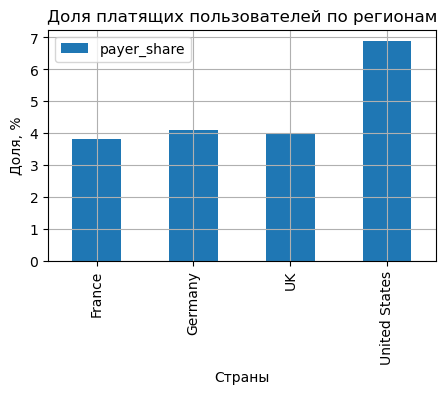

In [31]:
# доля платящих пользователей по регионам
payer_share(visits, profiles, group = 'region')
plt.title('Доля платящих пользователей по регионам')
plt.xlabel('Страны')
plt.ylabel('Доля, %');

Самая большая доля платящих пользователей в США - 6.9 %. Во Франции, Германии, Англии всего около 4% пользователей, кто оплатил приложение.

### Количество пользователей и доля платящих для каждого устройства

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

    device  all_users  payer_users  payer_share
1      Mac      31335         1912         6.10
3   iPhone      55798         3382         6.06
0  Android      36377         2050         5.64
2       PC      31681         1537         4.85
AxesSubplot(0.125,0.11;0.775x0.77)


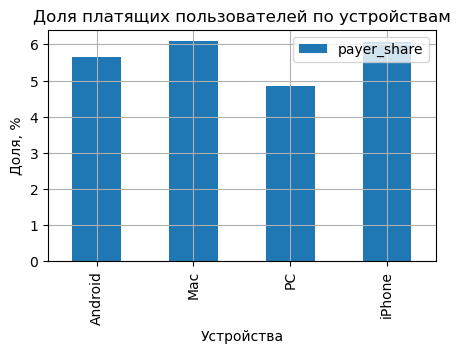

In [32]:
payer_share(visits, profiles, group = 'device')
plt.title('Доля платящих пользователей по устройствам')
plt.xlabel('Устройства')
plt.ylabel('Доля, %');

Самая большая доля платящих пользователей, которые используют iphone и Mac - 6.10% и 6.06% соответственно. Чуть меньше пользователей, пользующихся системой Android - 5.64%. А меньше всего платят пользователи, которые используют PC - 4.85%

### Количество пользователей и доля платящих для каждого канала привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

               channel  all_users  payer_users  payer_share
1             FaceBoom      29916         3557        11.89
0           AdNonSense       4199          440        10.48
9       lambdaMediaAds       2410          225         9.34
6               TipTop      20204         1878         9.30
5       RocketSuperAds       4988          352         7.06
7       WahooNetBanner       8845          453         5.12
8              YRabbit       4882          165         3.38
3         MediaTornado       4895          156         3.19
2              LeapBob       8875          262         2.95
4   OppleCreativeMedia       8929          233         2.61
10             organic      57673         1160         2.01
AxesSubplot(0.125,0.11;0.775x0.77)


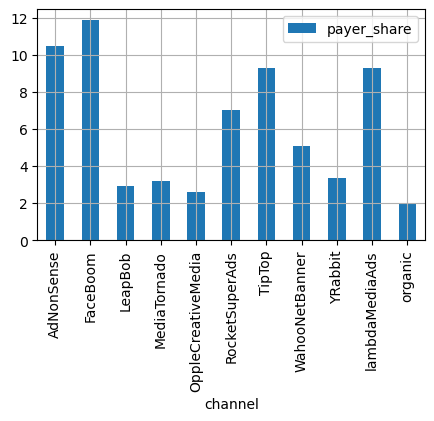

In [33]:
payer_share(visits, profiles, group = 'channel')

Из FaceBoom'a выходит самая большая доля платящих пользователей - 11.89%. Чуть меньше - из AdNonSense (10.48%). А меньше всего платят те, которые приходят сами (organic) - всего 2%. 

### Выводы

Наиболее охотно оплачивают приложение пользователи из США, пользователи, которые используют Mac или iphone и пользователи, которые пришли из FaceBoom'a. 
Самая маленькая доля платящих пользователей - из Франции. Менее всего приложение оплачивают те, кто заходит с PC и те, кто сам нашел приложение.

## Маркетинг

Проанализируем расходы на маркетинг. Для этого посчитаем общую сумму трат на рекламу, посмотрим динамику трат во времени и посчитаем стоимость привлечения одного пользователя из каждого источника.

### Общая сумма расходов на маркетинг

Посчитаем, сколько всего средств было потрачено на рекламу.

In [34]:
print('Общая сумма расходов на маркетинг:', round(costs['costs'].sum(), 2))

Общая сумма расходов на маркетинг: 105497.3


### Расходы на рекламу на каждый источник привлечения

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [35]:
channel_costs = costs\
                .groupby('channel')['costs']\
                .sum().sort_values(ascending = False)\
                .reset_index()
channel_costs

channel     costs
0              TipTop  54751.30
1            FaceBoom  32445.60
2      WahooNetBanner   5151.00
3          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
6             LeapBob   1797.60
7      lambdaMediaAds   1557.60
8        MediaTornado    954.48
9             YRabbit    944.22

Text(0.5, 1.0, 'Расходы на рекламу')

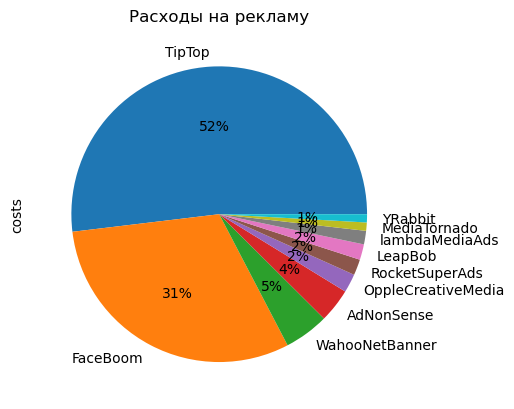

In [36]:
# построим диаграмму
costs.groupby('channel')['costs']\
     .sum()\
     .sort_values(ascending = False)\
     .plot(kind='pie', autopct = '%.0f%%')
plt.title('Расходы на рекламу')

Больше всего средств было потрачено на рекламу в TipTop - 54751.30 и FaceBoom - 32445.60, сумма их долей составляет 83% от общего бюджета. Меньше всего - на YRabbit и MediaTornado (меньше 1000 у.е.).

### Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику

Построим графики, отражающие динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [37]:
# рассчитаем номер недели и месяц
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs.head(3)

dt   channel  costs  week  month
0  2019-05-01  FaceBoom  113.3    18      5
1  2019-05-02  FaceBoom   78.1    18      5
2  2019-05-03  FaceBoom   85.8    18      5

In [38]:
week_costs = costs.pivot_table(index = ['week'], columns = 'channel', values = 'costs', aggfunc = 'sum')
week_costs

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
week                                                                       
18           211.05     535.7    16.80         38.64               24.00   
19           273.00     750.2    31.71         61.68               34.50   
20           265.65     755.7    26.67         59.04               27.50   
21           266.70     722.7    26.67         50.16               34.25   
22           202.65    1208.9    65.52         36.96               81.75   
23           102.90    1081.3    66.99         27.60               79.50   
24            96.60    1042.8    52.29         29.76               71.50   
25           141.75    1280.4    68.46         32.16               79.75   
26           148.05    1647.8    99.75         40.56              107.00   
27           130.20    1536.7    87.36         43.44              102.50   
28           106.05    1124.2    62.58         28.80               81.00   
29            97.65     975.7    61.11         26.40               68.00   
30           118.65    1130.8    67.20         25.20               80.75   
31           141.75    1419.0    83.58         35.04               90.75   
32           116.55    1290.3    87.57         29.04              104.00   
33           117.60    1456.4    77.49         40.80               98.50   
34           142.80    1411.3    90.51         35.28              103.75   
35           133.35    1445.4    77.91         33.84               92.75   
36           100.80    1151.7    66.99         30.24               72.75   
37           100.80    1148.4    63.84         25.92               78.00   
38           139.65    1496.0    81.27         30.24              105.75   
39           192.15    1837.0   101.22         48.24              132.25   
40           155.40    1761.1   101.01         42.00              123.00   
41           136.50    1392.6    78.96         36.96               88.25   
42           118.65    1291.4    69.72         29.04               88.00   
43           154.35    1552.1    84.42         37.44              101.50   

channel  RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
week                                                                      
18               99.450   347.0            49.2    52.20            81.6  
19              139.230   470.0            92.4    75.90           103.2  
20              138.060   454.0            90.0    69.30            90.4  
21              131.040   801.8            79.2    65.40           119.2  
22               97.695  1421.2           179.4    49.80            83.2  
23               76.050  1223.6           196.8    25.80            35.2  
24               63.180  1121.0           166.2    17.46            45.6  
25               80.730  1474.4           201.6    22.14            40.0  
26               78.260  2343.6           285.0    27.90            59.2  
27               75.075  2340.0           256.8    28.26            60.0  
28               55.965  1820.0           174.0    19.44            44.8  
29               41.860  1552.2           159.6    15.66            41.6  
30               54.600  1713.4           182.4    22.86            49.6  
31               61.880  2493.6           204.6    27.33            52.0  
32               69.615  2448.0           231.6    28.56            41.6  
33               62.010  2538.0           238.2    28.56            46.4  
34               40.300  2514.0           244.8    30.03            57.6  
35               51.350  2583.0           235.8    24.36            54.4  
36               40.625  2563.0           174.6    27.93            52.0  
37               40.950  2506.0           192.6    29.76            41.6  
38               56.225  3241.0           226.2    39.60            57.6  
39               63.700  3979.5           303.0    47.52            80.0  
40               66.300  3703.0           309.0    45.36            59.

In [39]:
# создадим сводную таблицу расходов по месяцам
month_costs = costs.pivot_table(index = ['month'], columns = 'channel', values = 'costs', aggfunc = 'sum')#.cumsum(axis=1)
month_costs

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                      
5           1169.70    3524.4   140.28        238.56              169.75   
6            538.65    5501.1   314.58        138.00              370.00   
7            504.00    5294.3   313.53        138.48              366.50   
8            579.60    6274.4   369.81        154.56              439.25   
9            581.70    6114.9   343.98        144.72              427.75   
10           537.60    5736.5   315.42        140.16              378.00   

channel  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
month                                                                      
5               577.980   2981.0           418.8   299.70           458.4  
6               325.715   6675.6           921.0   106.20           199.2  
7               252.070   8410.2           851.4    97.38           219.2  
8               253.110  11202.0          1040.4   124.74           220.0  
9               218.400  13232.5           977.4   152.79           247.2  
10              205.725  12250.0           942.0   163.41           213.6

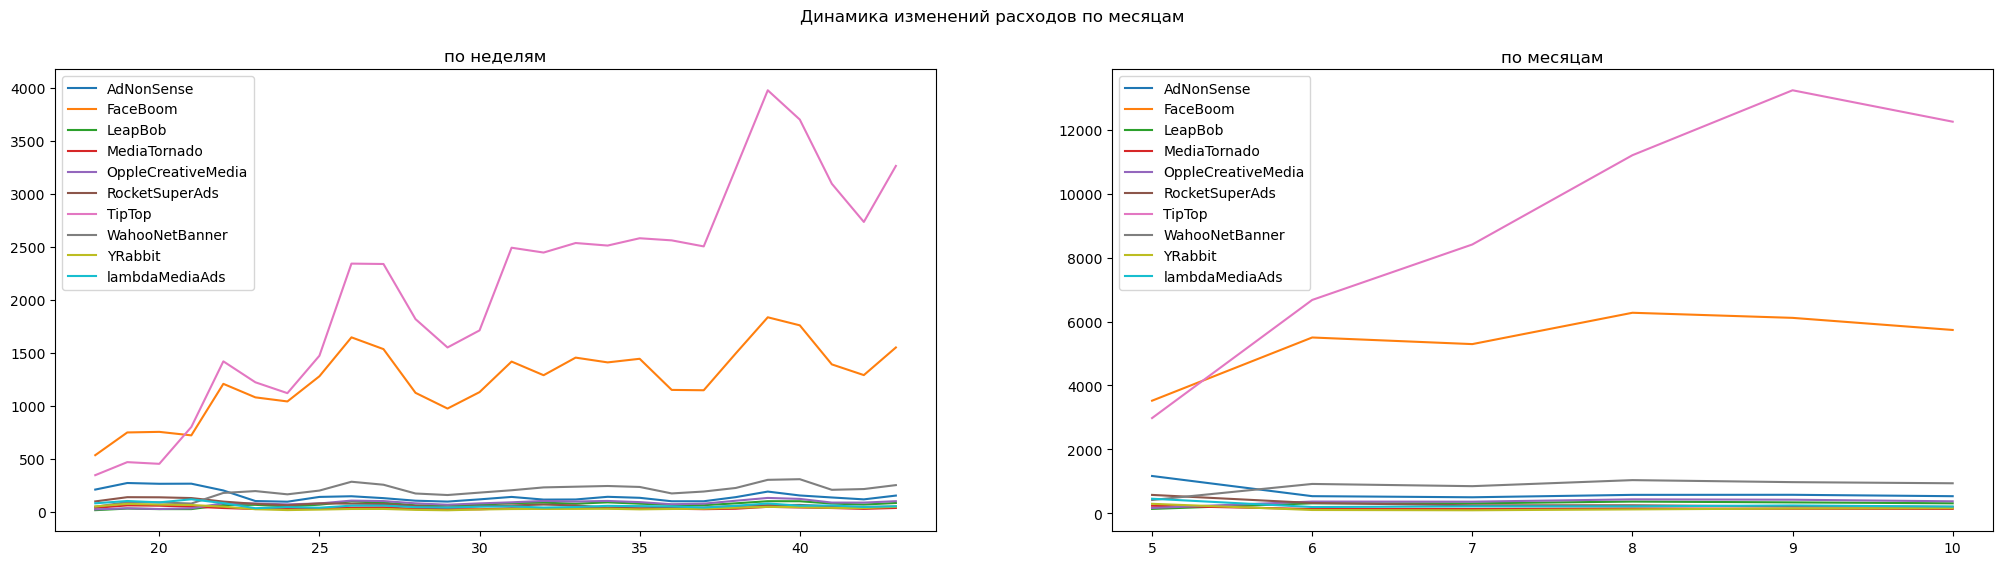

In [40]:
# построим графики
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,6))
fig.suptitle("Динамика изменений расходов по месяцам")

ax1.plot(week_costs);
ax1.set_title('по неделям')
ax1.legend(labels  = week_costs.columns)

ax2.plot(month_costs)
ax2.set_title('по месяцам')
ax2.legend(labels  = month_costs.columns)

На графике хорошо видно, что больше всего средств в течении всего времени выделялось для рекламы в TipTop и в FaceBoom. В первые несколько недель на рекламу в FaceBoom было вложено больше, чем в TipTop. Но потом картина меняется, среств для FaceBoom стали выделять больше всех остальных, и отрыв с каждой неделей становится все больше. По общей картине видим, что в целом расходы на рекламу высокооплачиваемых источников уходят в сторону увеличения, тогда как малооплачиваемые источники остаются примерно на одном и том же уровне. В динамике расходы не растут постоянно, а скачат, повышаются, понижаются.  
Картина расходов по месяцам схожа. Во второй месяц маркетологи поменяли доли вкладываемых средств в малооплачиваемые источники. Каким-то увеличили бюджет, каким-то уменьшили. Из малооплачиваемых источников чуть больше вкладывается в WahooNetBanner, хотя в первый месяц лидером был AdNonSense. 

### Стоимость привлечение одного пользователя (CAC) из каждого источника.

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [41]:
#считаем количество пользователей с каждого канала привлечения
users_in_chanel = profiles.groupby('channel').agg({'user_id':'nunique'}).reset_index()

# объединяем с затратами на рекламу
costs_on_user = channel_costs.merge(users_in_chanel)

# считаем среднее
costs_on_user['mean'] = round(costs_on_user['costs']/costs_on_user['user_id'], 2)
costs_on_user = costs_on_user.sort_values(by='mean', ascending = False)
costs_on_user

channel     costs  user_id  mean
0              TipTop  54751.30    19561  2.80
1            FaceBoom  32445.60    29144  1.11
3          AdNonSense   3911.25     3880  1.01
7      lambdaMediaAds   1557.60     2149  0.72
2      WahooNetBanner   5151.00     8553  0.60
5      RocketSuperAds   1833.00     4448  0.41
4  OppleCreativeMedia   2151.25     8605  0.25
8        MediaTornado    954.48     4364  0.22
9             YRabbit    944.22     4312  0.22
6             LeapBob   1797.60     8553  0.21

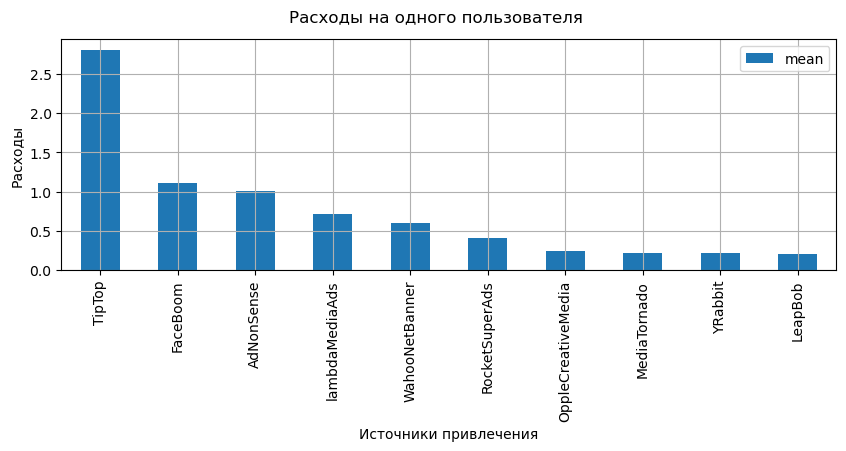

In [42]:
#построим график для визуaлизации
costs_on_user.plot(x = 'channel', y = 'mean', kind = 'bar', grid = True, figsize = (10,3))
plt.suptitle("Расходы на одного пользователя")
plt.xlabel("Источники привлечения")
plt.xticks(np.arange(len(costs_on_user)), costs_on_user['channel'])
plt.xticks(rotation = 90)
plt.ylabel("Расходы");

Самая большие рекламные расходы на одного пользователя приходятся на канал привлечения TipTop (2.80 у.е.). Меньше всего расходов на одного пользователя потрачено на канал LeapBob (0.21 у.е).

Посчитаем стоимость привлечения для всего проекта, предварительно очистим данные от источников 'organic'.

In [43]:
# поделим общую сумму рекламы на общее кол-во пользователей 
cac = round(costs['costs'].sum() / profiles.query('channel != "organic"')['user_id'].nunique(), 2)
cac

1.13

В среднем один пользователь обходится в 1.13 у.е. Близко к этому значению САС FaceBoom'a - 1.11 у.е. А вот реклама в самый дорогой канал привлечения (TipTop) обходится почти в 2.5 раза дороже.

### Выводы

Итак, всего за полгода было потрачено 10547.3 у.е. на рекламу. 83% бюджета потрачено на рекламу в сетях TipTop (54751.30 у.е.) и FaceBoom (32445.60 у.е.). Меньше всего - на YRabbit и MediaTornado (меньше 1000 у.е. на каждый). С каждым месяцем общая сумма расходов на рекламу увеличивалась, но в конце рассматриваемого периода виден небольшой спад. На рекламу в других источниках выделяется примерно одна сумма в течение рассматриваемого периода. Только во второй месяц произошла небольшая корректировка в долях финансирования. Самое дорогое привлечение одного клиента обходится в 2.8 у.е., почти в 2.5 раза дороже чем средний показатель CAC: и это клиент пришедший из TipTop.

## Окупаемость рекламы

Проанализируем окупаемость рекламы, используем графики LTV, ROI и CAC. Построим графики конверсии и удержания.

Для анализа исключим пользователей, которые пришли не из рекламных каналов

In [44]:
profiles_without_organic = profiles.query('channel != "organic"') 

### Окупаемость рекламы

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

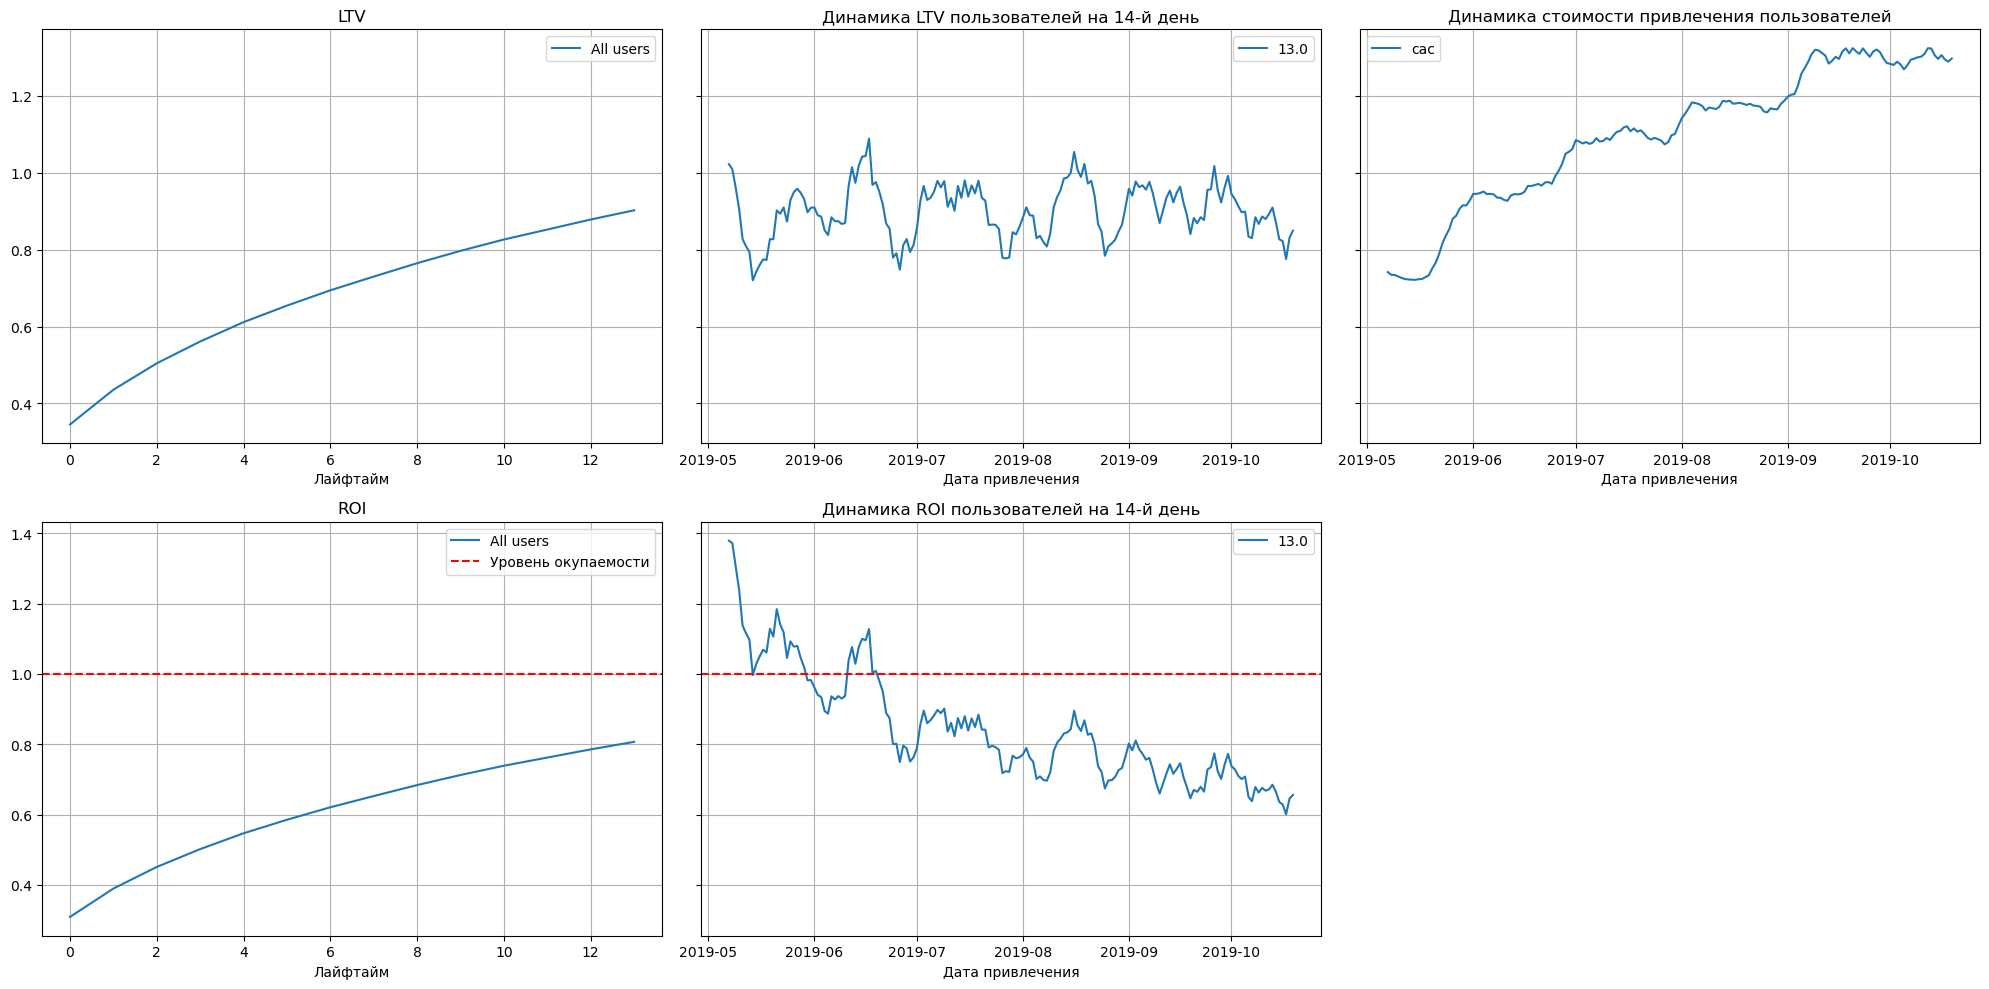

In [45]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_without_organic, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:  
Реклама не окупается. ROI в конце рассматриваемого периода - 80%.  
CAC скачкообразно растет. Значит, стоимость привлечения клиента с каждым месяцем растет.  
LTV стабилен. Значит, дело не в ухудшении качества пользователей.  
Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

### Окупаемость рекламы с разбивкой по устройствам

 Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

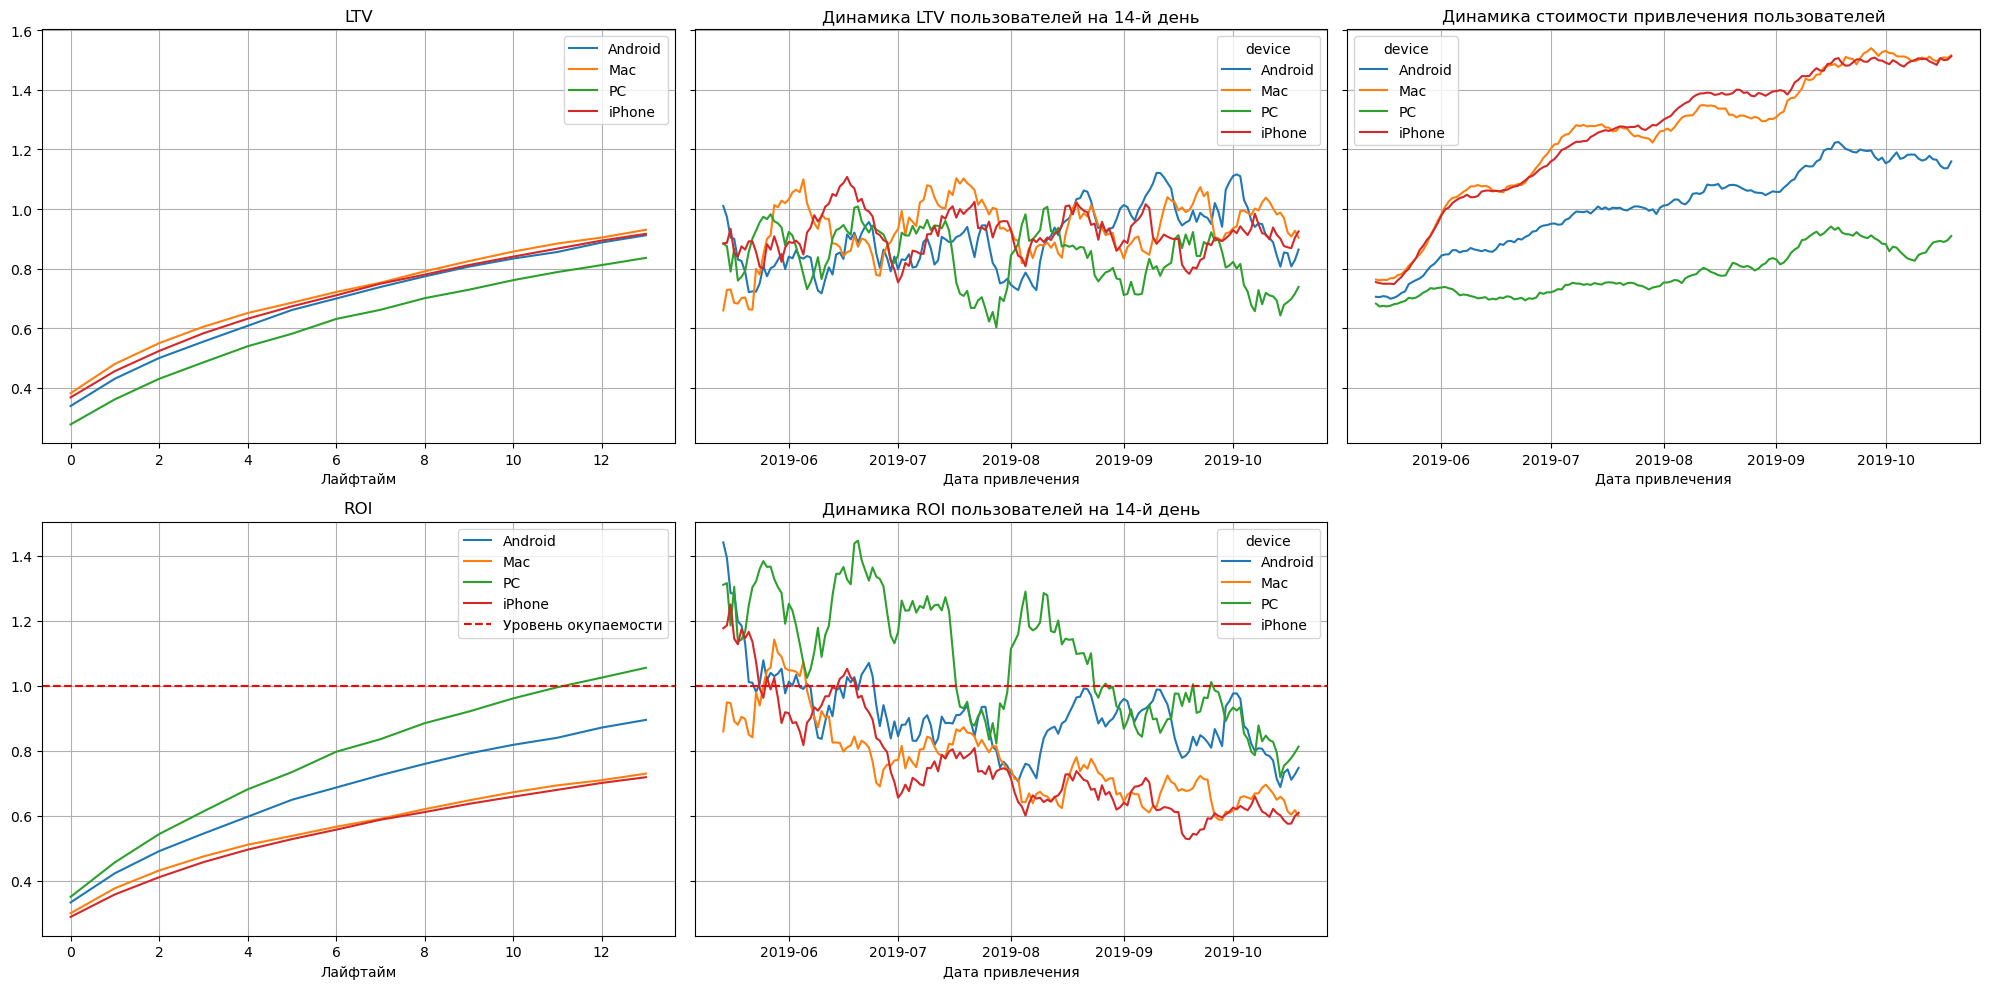

In [46]:
# окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Окупились только пользователи PC. Окупаемость Android приближается к 100%, но еще не достигает эту планку. Пользователи Mac и iPhone на одном уровне и не дошли даже до окупаемости 80%.  
САС на всех платформах растет. Стоимость привлечения пользователей iphone и Mac выше остальных, причем их позиции постоянно меняются.  
Показатель LTV стабильно растет.

### Окупаемость рекламы с разбивкой по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

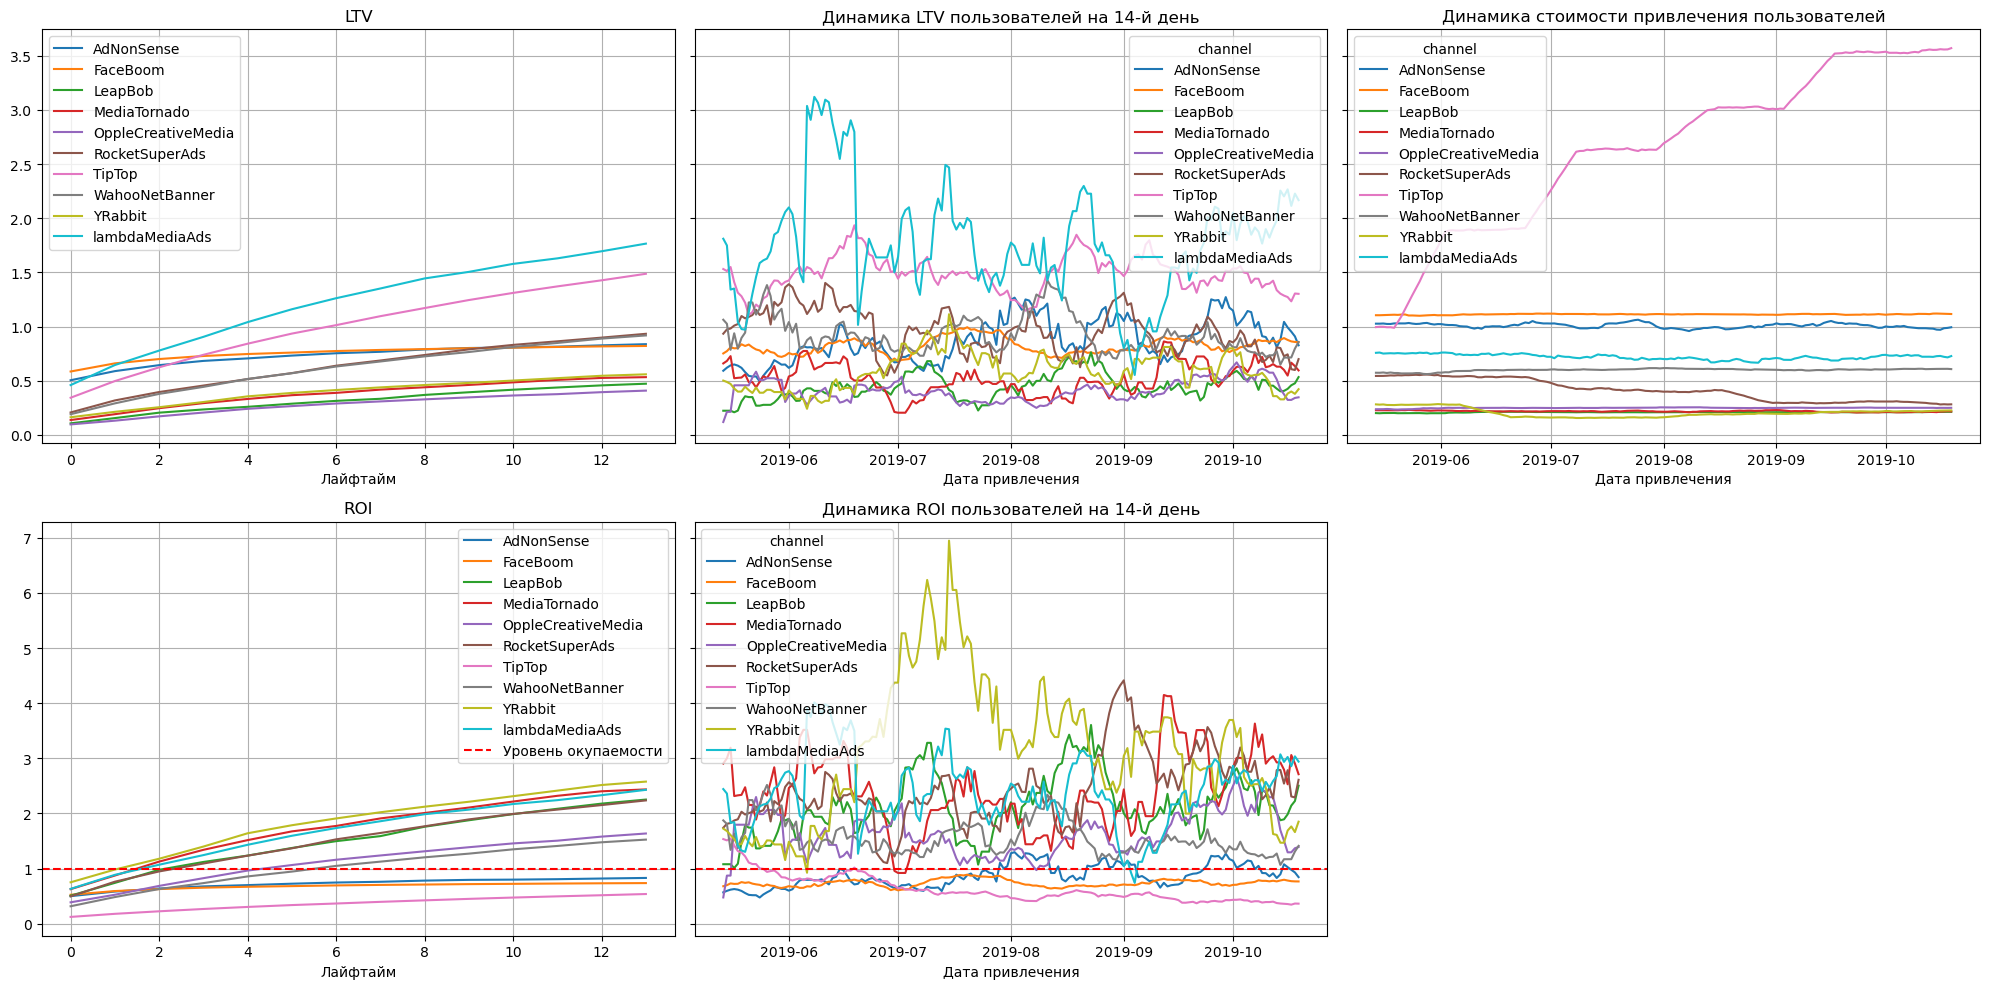

In [47]:
# с разбивкой по каналам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Самые дорогие каналы привлечения - TipTop, FaceBoom и AdNonSense  не окупаются.  
Стоимость привлечения пользователя из приложения TipTop растет с каждым месяцем.  
И динамика окупаемости TipTop на 14 день стабильно снижается.

### Окупаемость рекламы с разбивкой по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

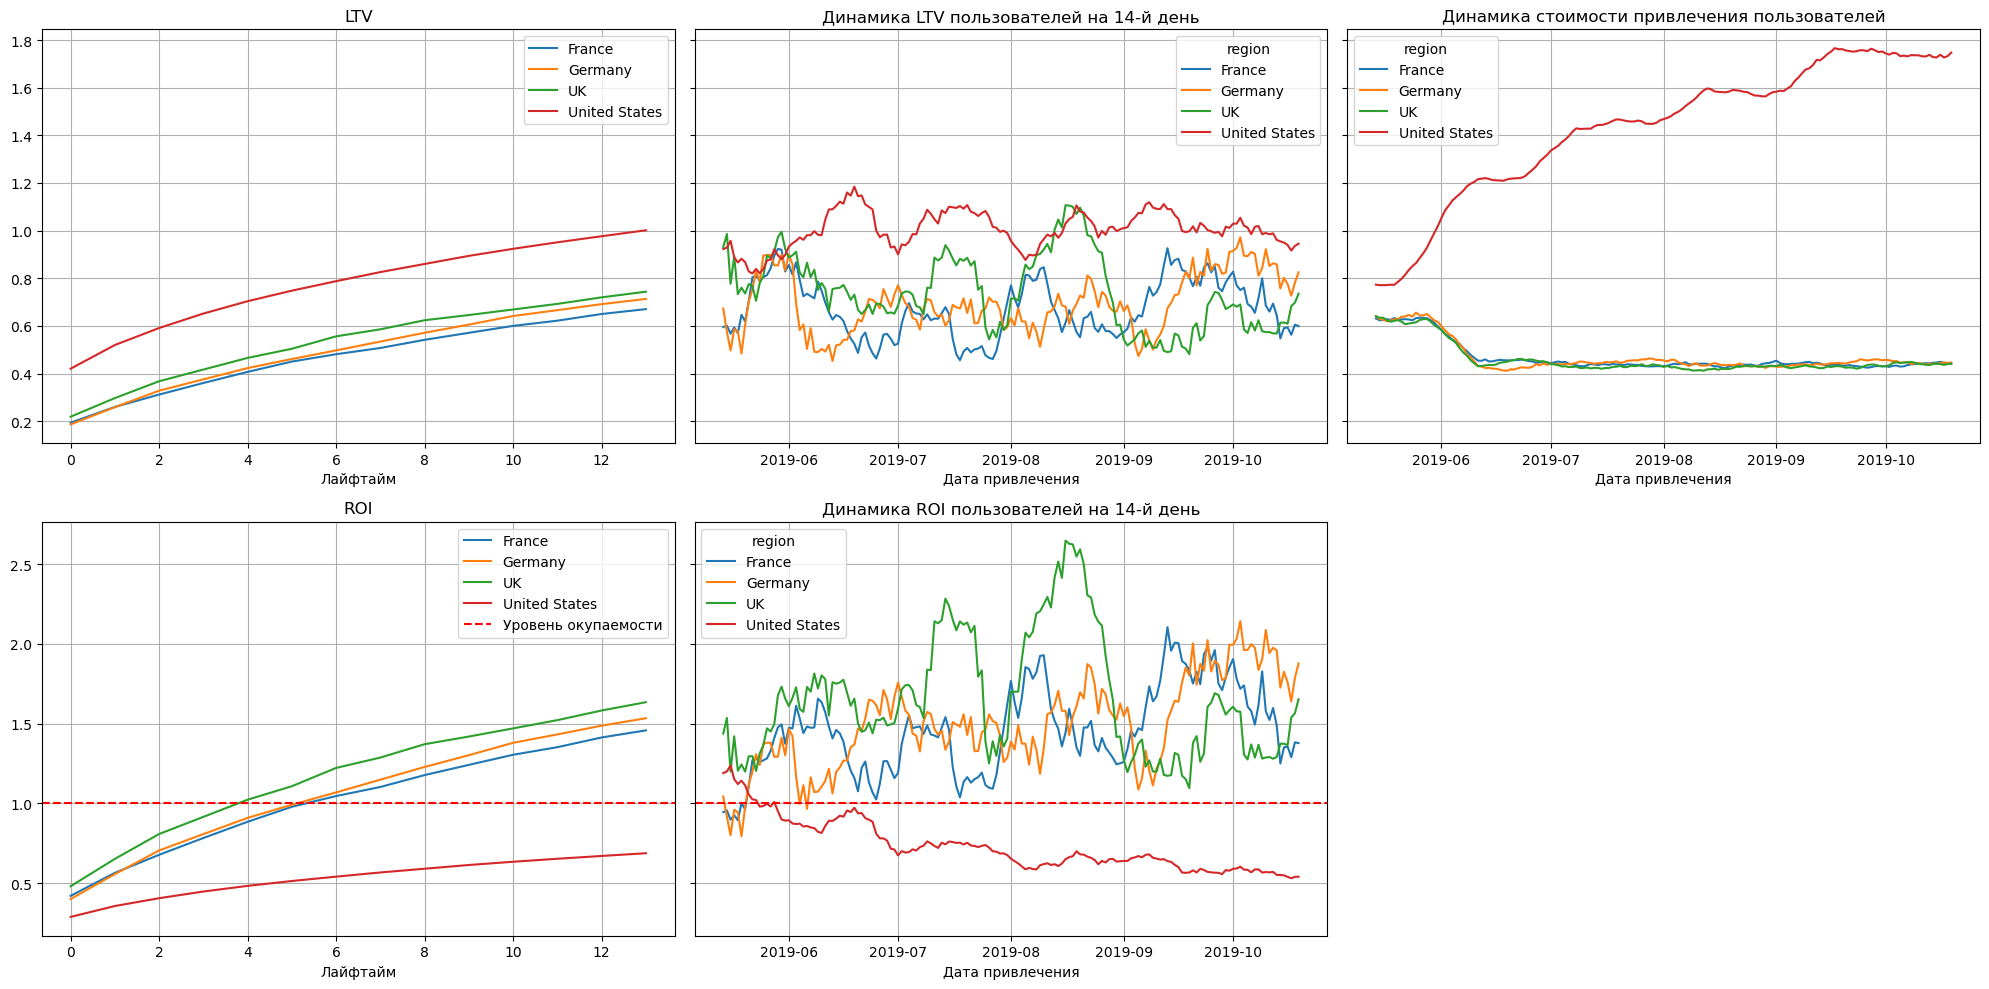

In [48]:
# окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Все страны, кроме США, окупаются, причем довольно быстро, к 4-6 дню. 
Динамика окупаемости на 14 день снижается к концу рассматриваемого периода.
Стоимость привлечения в США заметно растет, тогда, как в других странах этот показатель уменьшился в первый месяц и далее стабилен в течении всего рассматриваемого периода.  
Показатель LTV стабилен везде.

Окупаемость пользователей из США самая низкая, а стоимость привлечения - самая большая и растет с каждым месяцем, рассмотрим конверсию и удержание на 14 дней с разбивкой по регионам.  
Также посмотрим коверсию и удержание с разбивкой по источникам привлечения, т.к. на TipTop и FaceBoom расходы на рекламу увеличиваются, и не окупаются.

### Маркетинг в США

Так как в США самая низкая окупаемость, рассмотрим бизнес-показатели  этой страны поближе.

In [49]:
# выберем пользователей из США и только из рекламных каналов
profiles_usa = profiles_without_organic.query('region == "United States"')

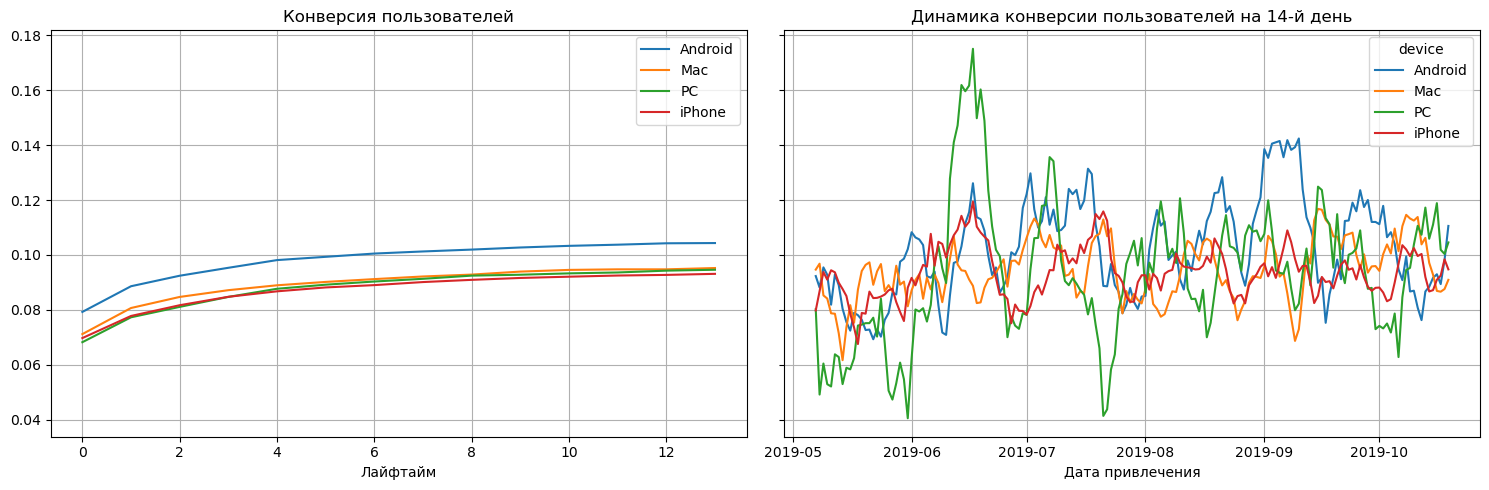

In [50]:
# конверсия по устройствам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion, conversion_history, horizon_days)

По устройствам конверсия почти одинаковая, немного выше у Android.

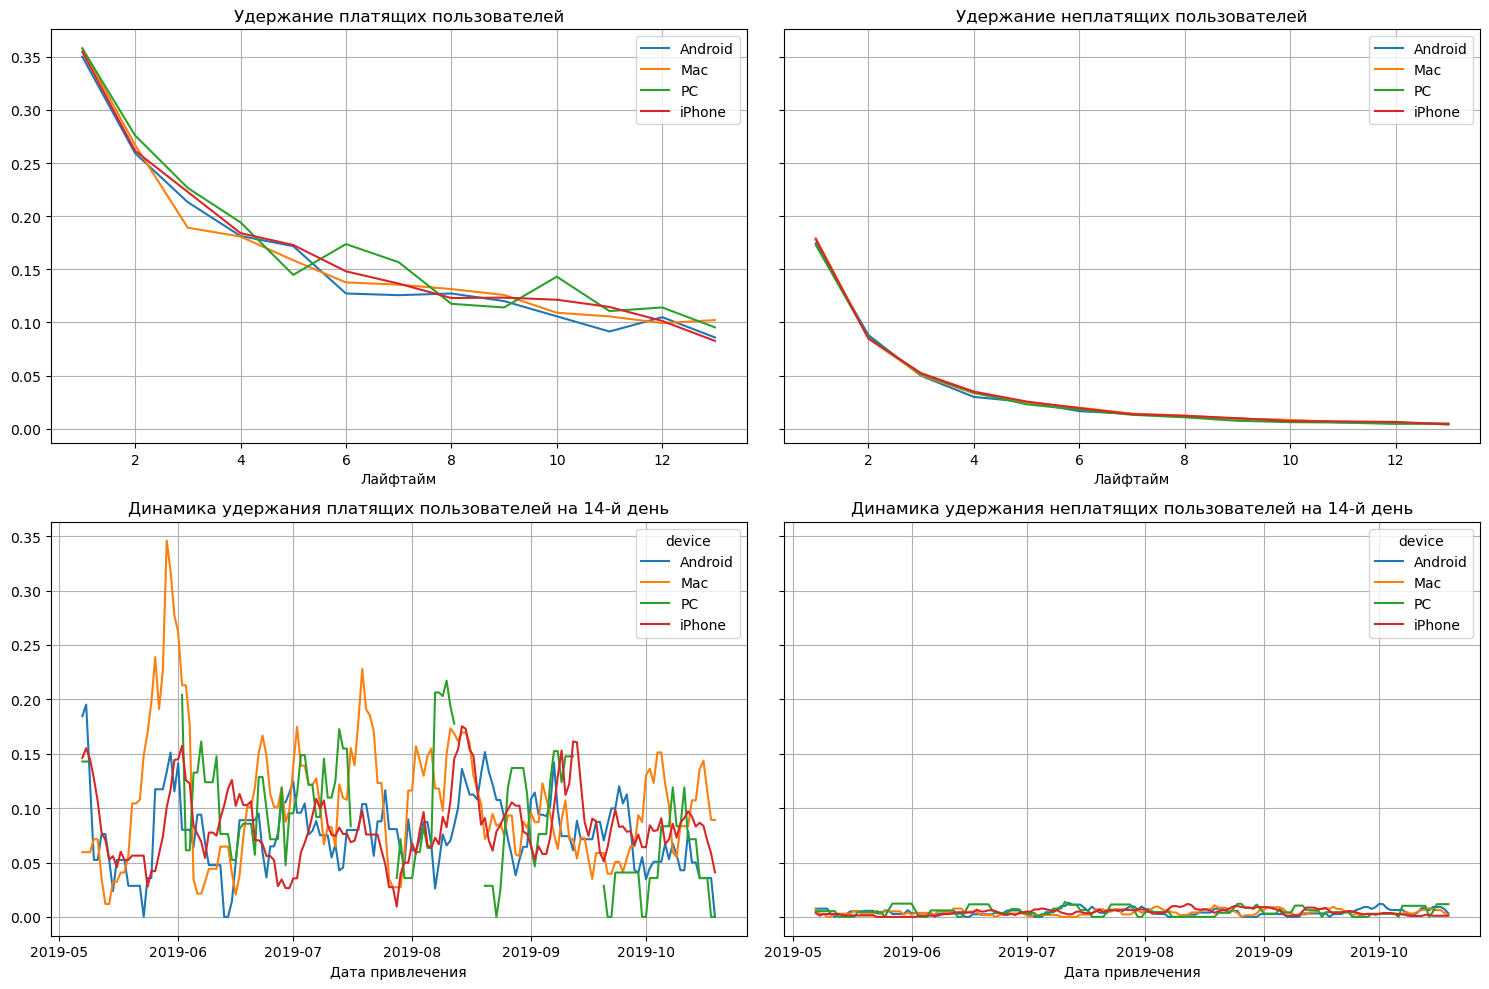

In [51]:
# удержание по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=['device'])

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по всем устройствам равномерное.

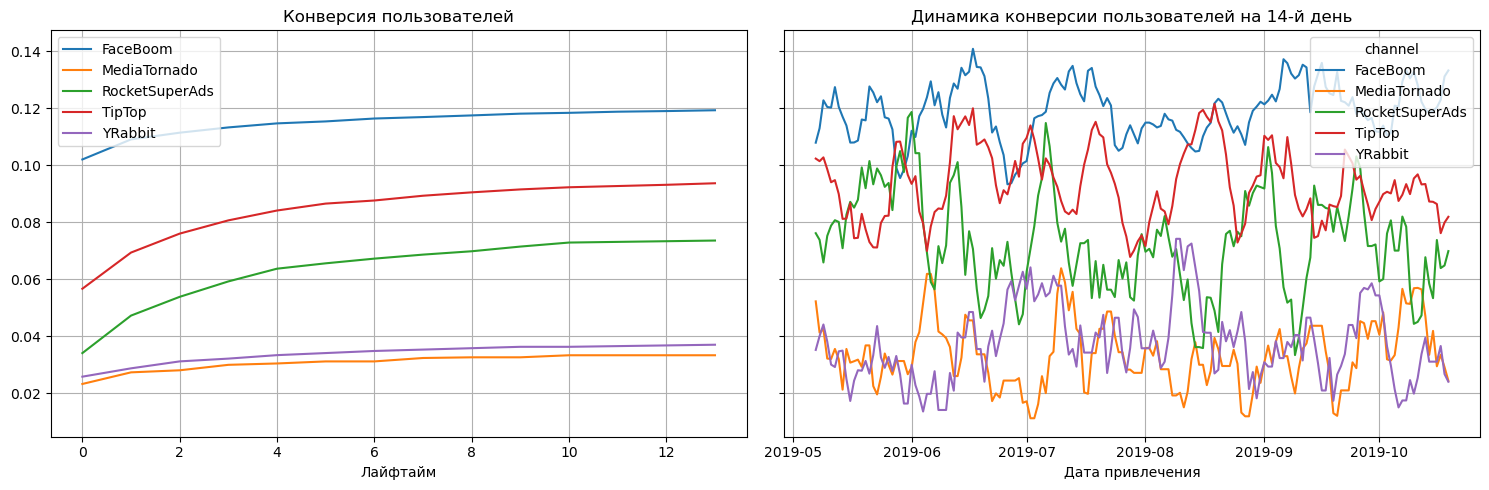

In [52]:
# конверсия по каналам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel'])

plot_conversion(conversion, conversion_history, horizon_days)

При фильтрации по стране из всех каналов осталось только 5, которые находятся в США. Конверсия у FaceBoom самая большая, далее идут TipTop и RocketSuperAds.

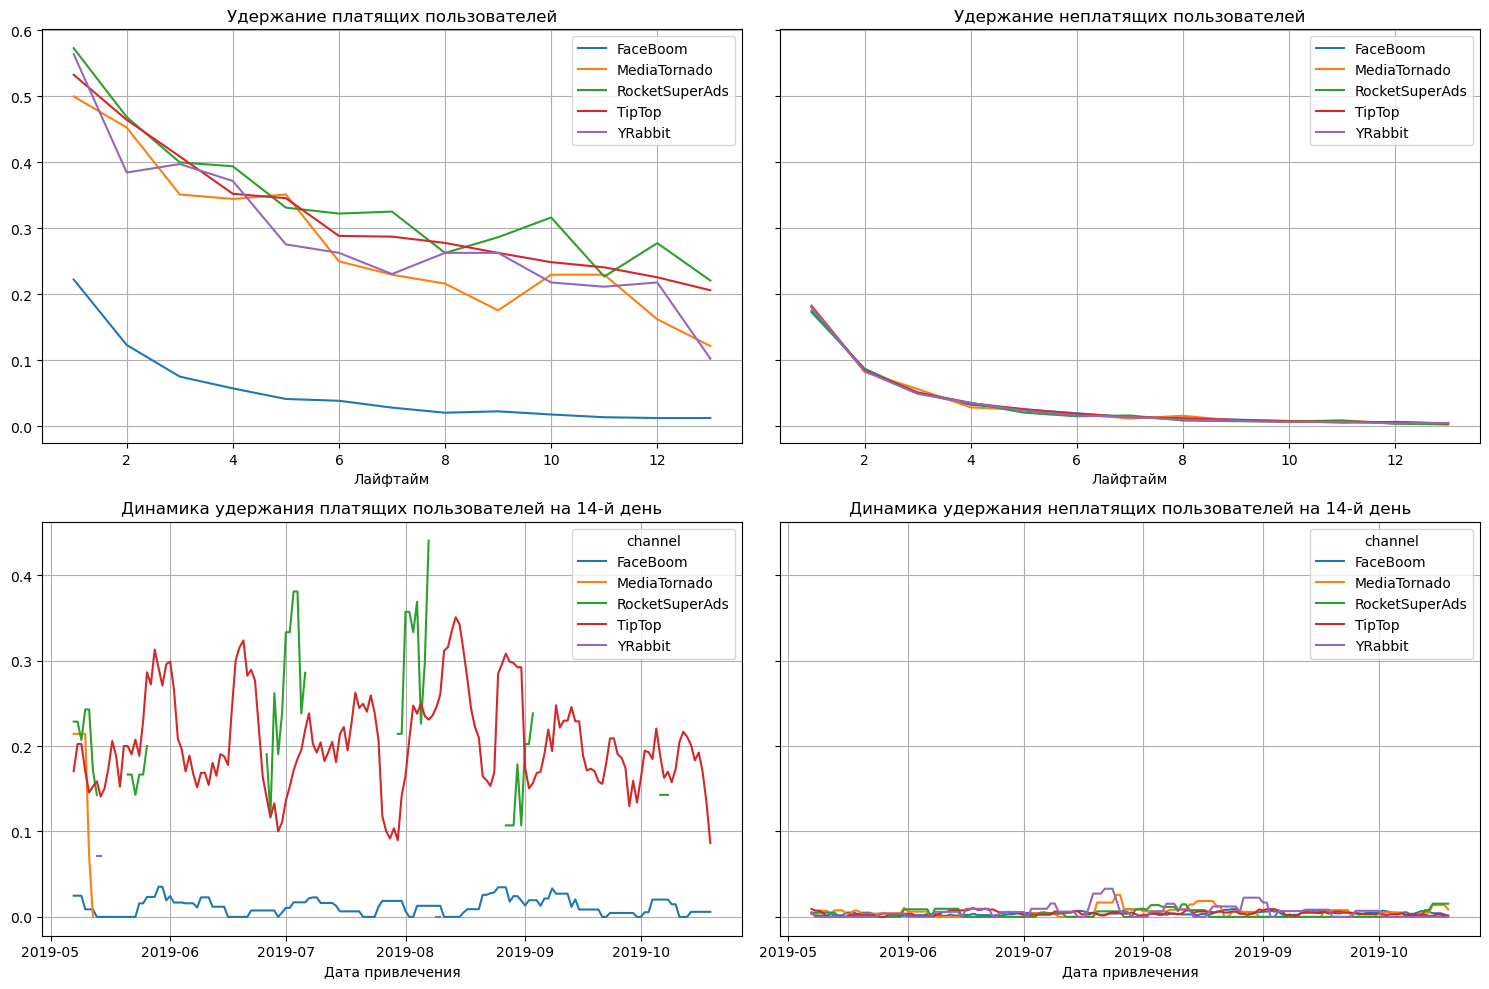

In [53]:
# удержание по каналами
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days) 

По каналу FaceBoom самое низкое удержание платящих пользователей, почти на 30 процентных пунктов ниже, чем у остальных.

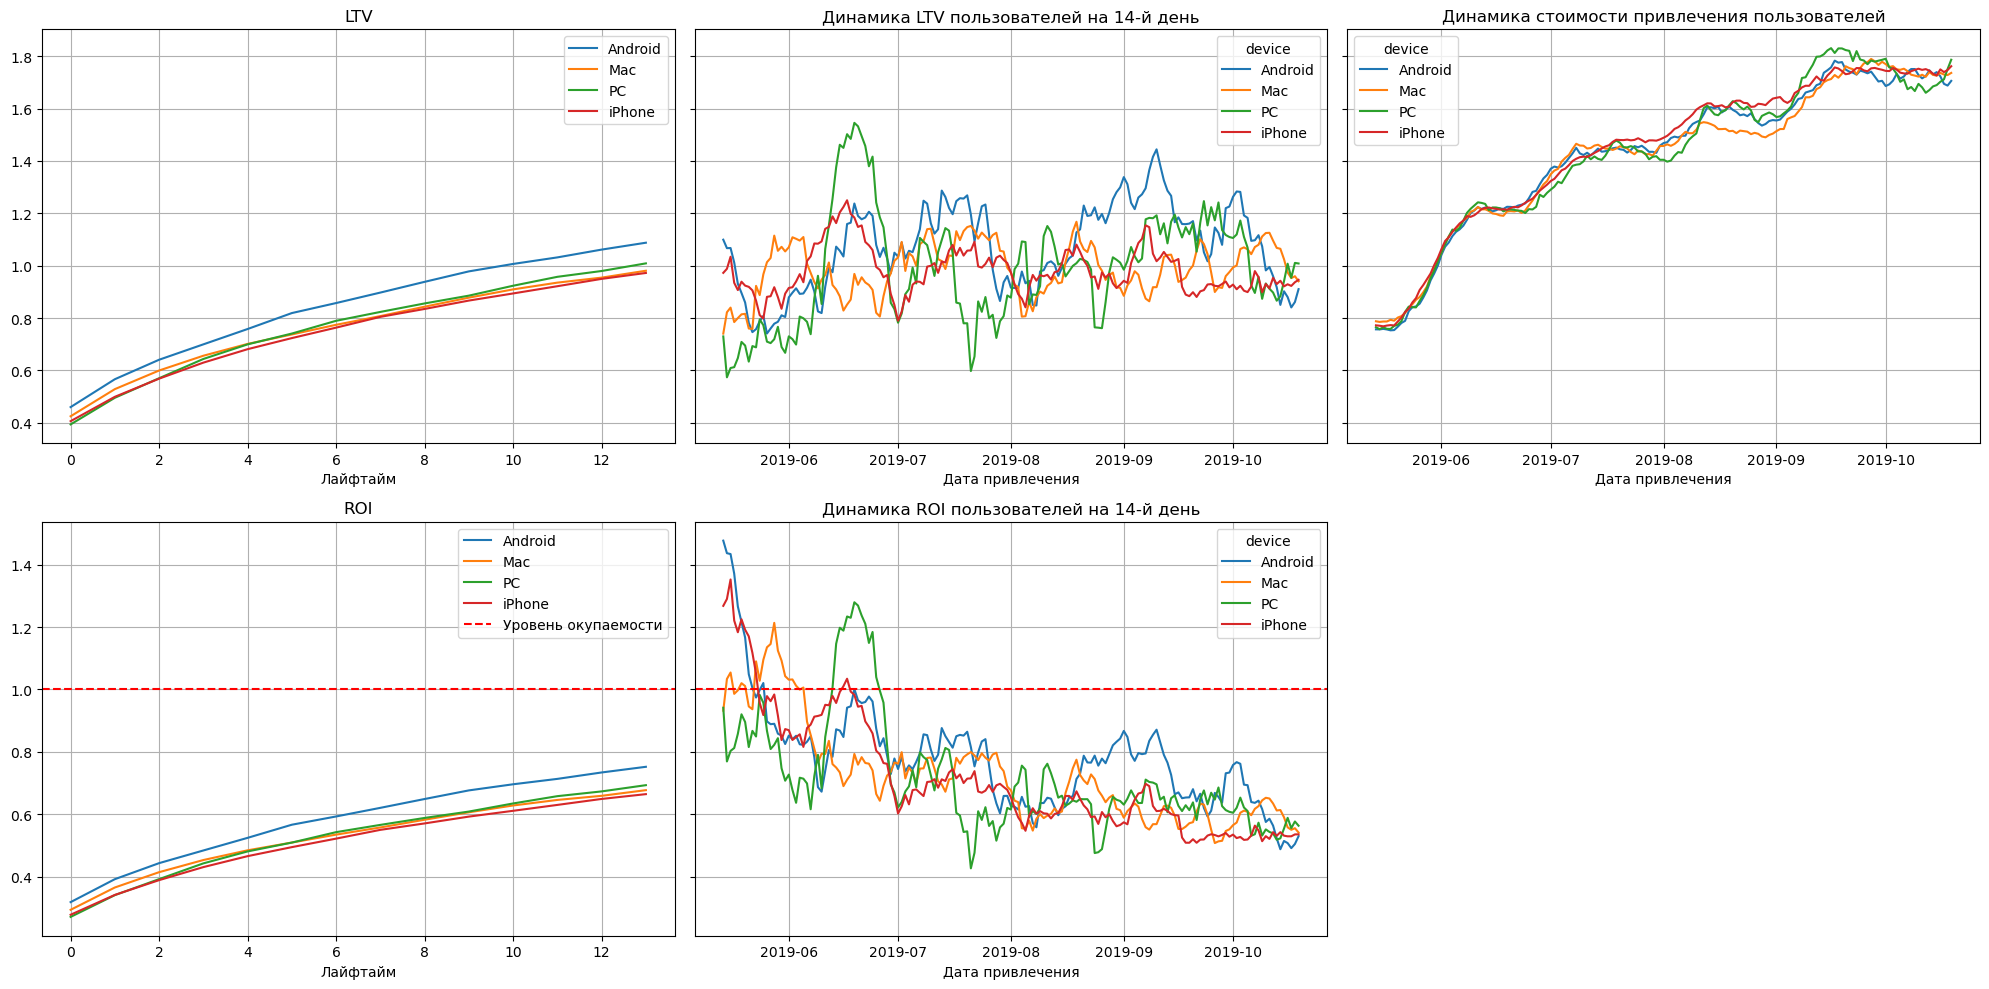

In [54]:
# окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Окупаемость всех устройств ниже 80%

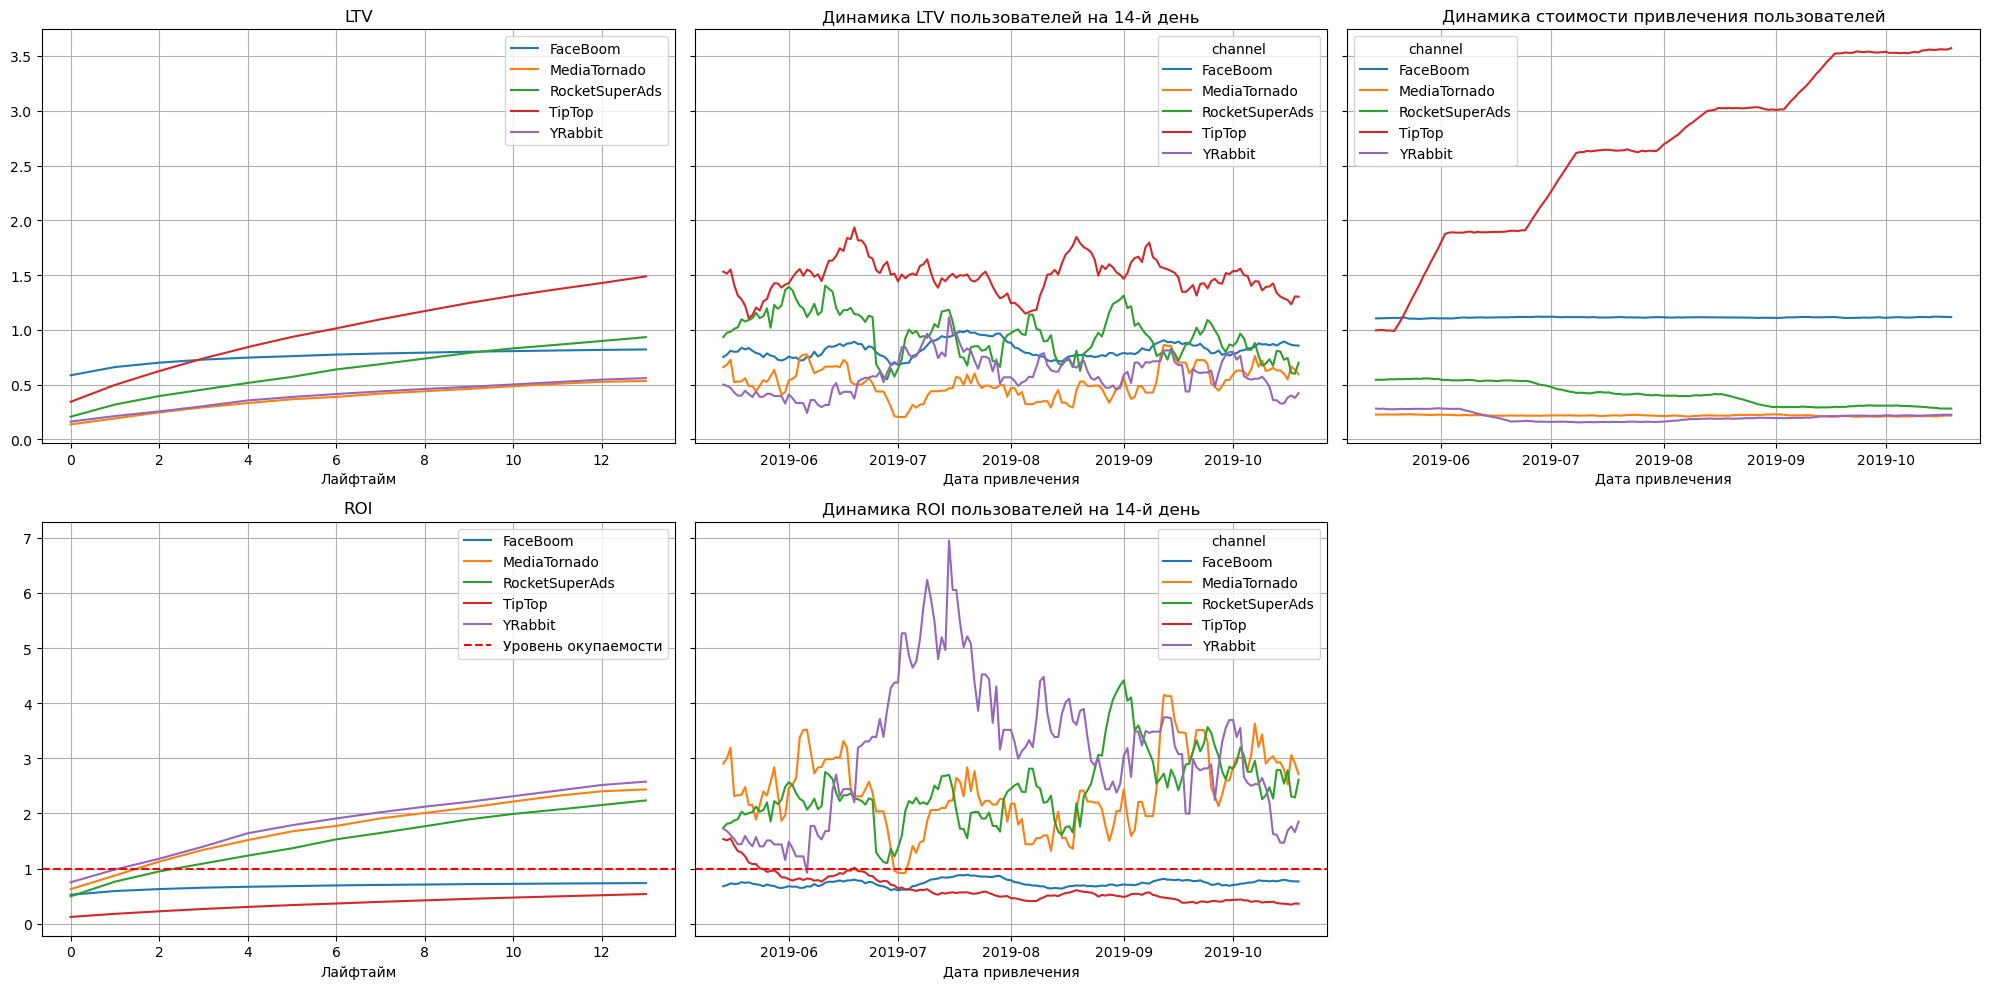

In [55]:
# окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Из 5 каналов очень быстро окупаются YaRabit, RocketSuperAd и MediaTornado. FaceBoom и TipTop опять в отстающих, окупаемости не достигают.

Рассмотрев поближе показатели в разрезе только США, можно сделать вывод, то здесь находятся самые дорогие каналы привлечения, которые не окупаются, поэтому и окупаемость в целом по США по сравнению в другими странами самая низкая.

### Конверсия пользователей

Проверим конверсию пользователей с разбивкой по регионам и по каналам удержания и динамику её изменения. Построим график конверсии.

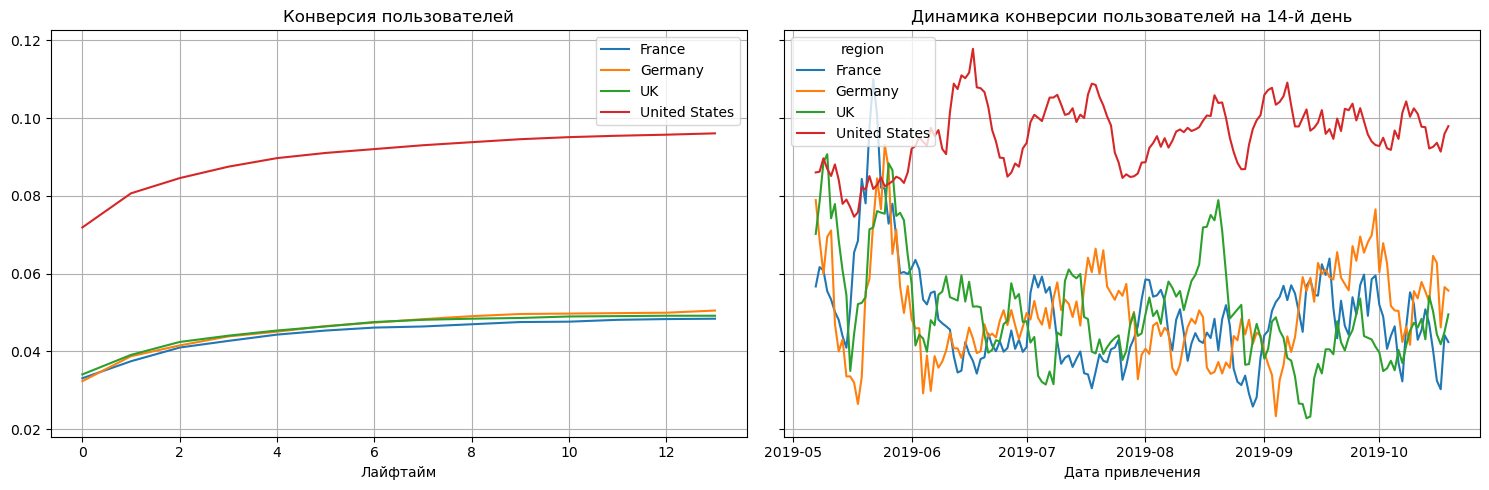

In [56]:
# конверсия по регионам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['region'])

plot_conversion(conversion, conversion_history, horizon_days)

Конверсия пользователей по США заметно выше остальных стран. Значит, дело не в конверсии по странам. Посмотрим конверсию по каналам удержания.

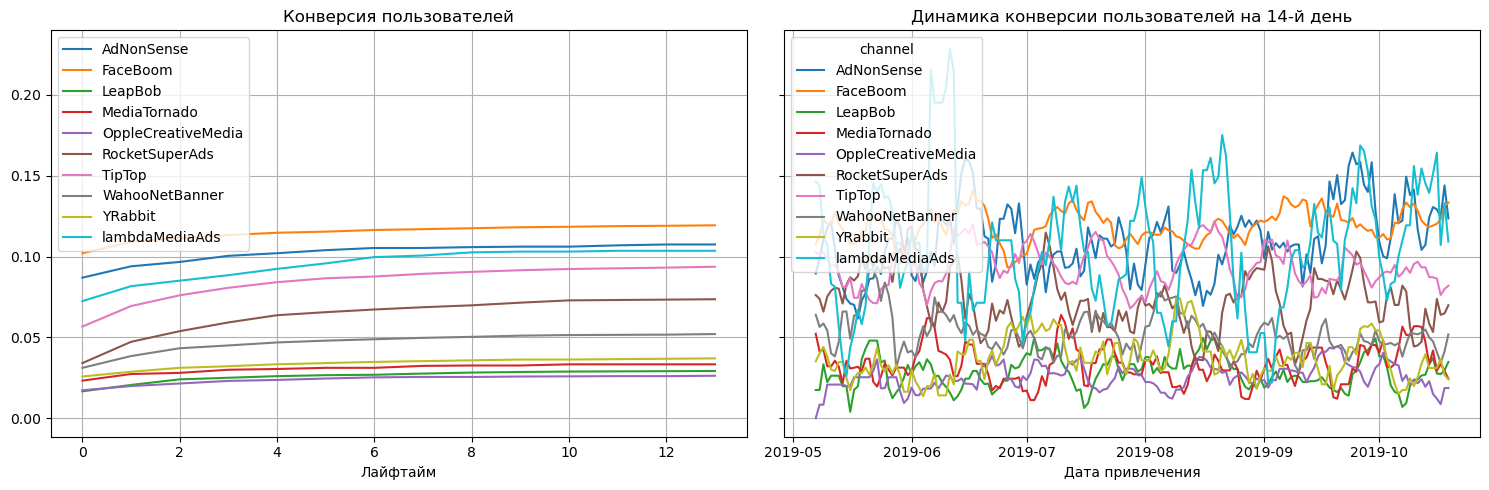

In [57]:
# конверсия по каналам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['channel'])

plot_conversion(conversion, conversion_history, horizon_days)

Конверсия по каналам удержания тоже стабильная. Посмотрим коверсию с разбивкой по устройствам.

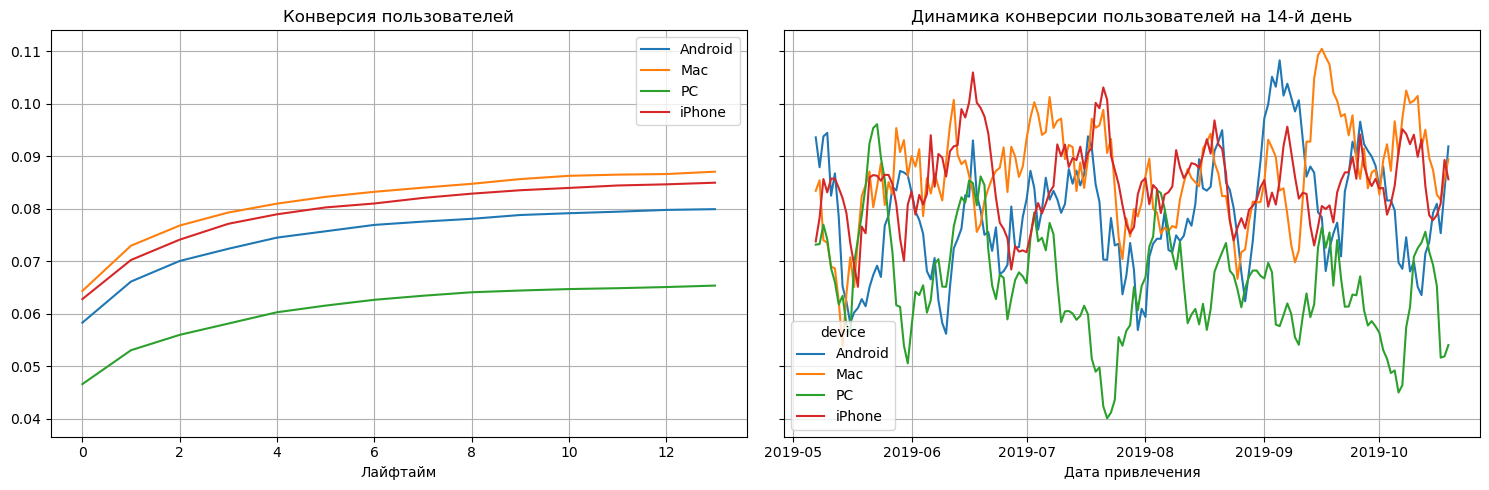

In [58]:
# конверсия по устройствам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion, conversion_history, horizon_days)

По графику видим, что наименьшая конверсия у пользователей с PC.

### Удержание пользователей

Проверим удержание пользователей и динамику её изменения. Построим и изучим график удержания.

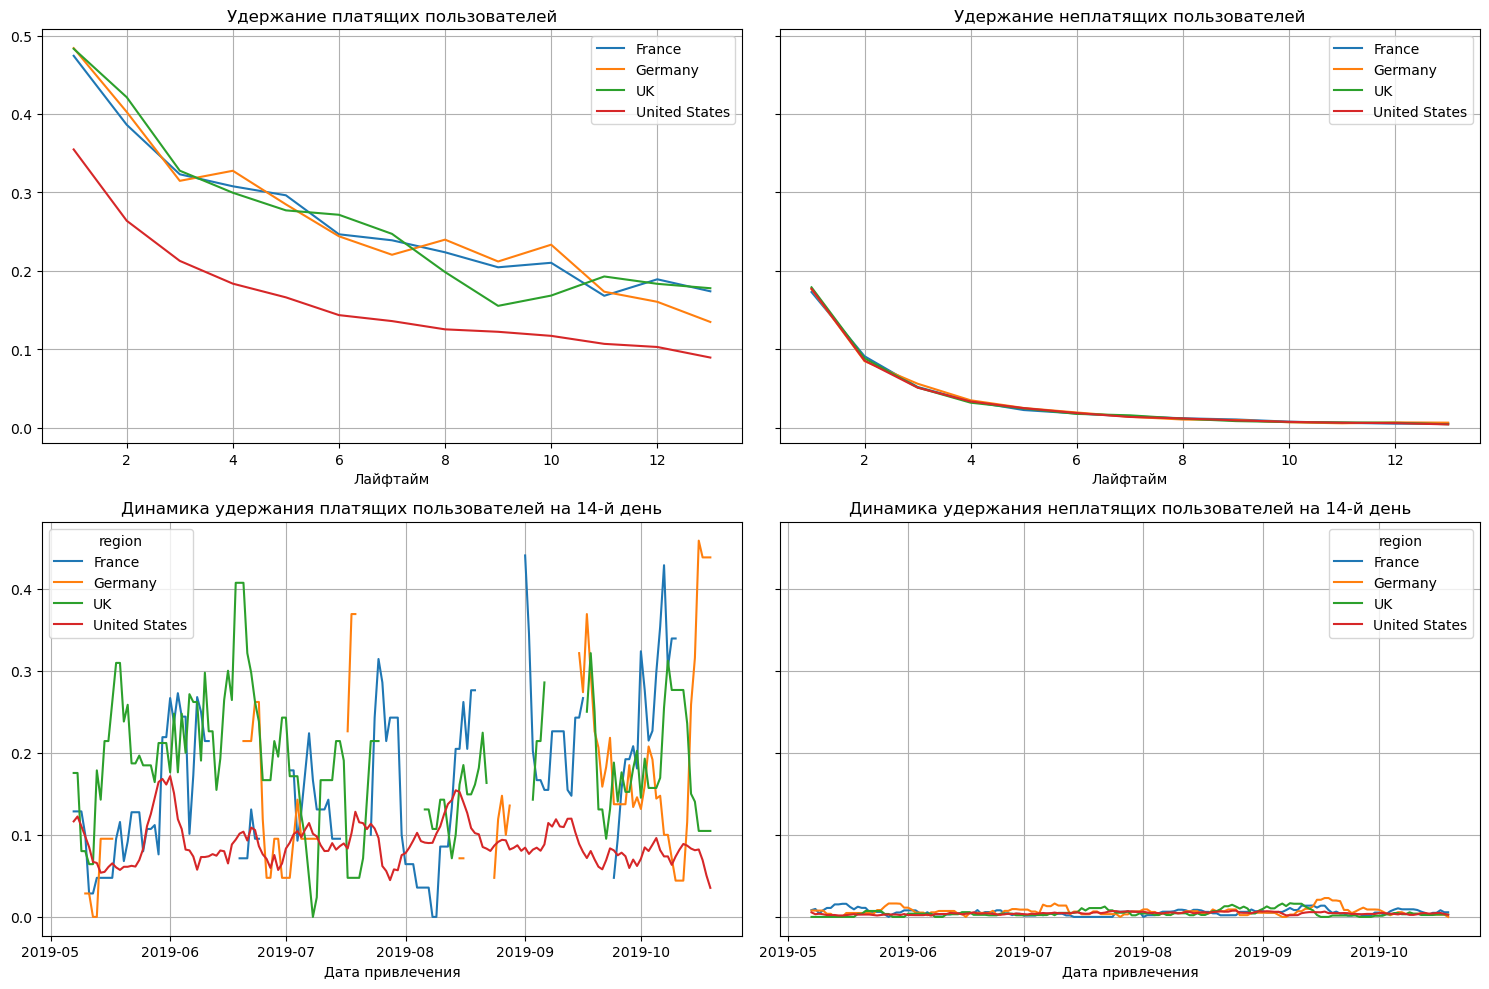

In [59]:
# смотрим удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей падает во всех странах, но ниже всего этот показатель в США.

Посмотрим конверсию и удержания по каналам привлечения.

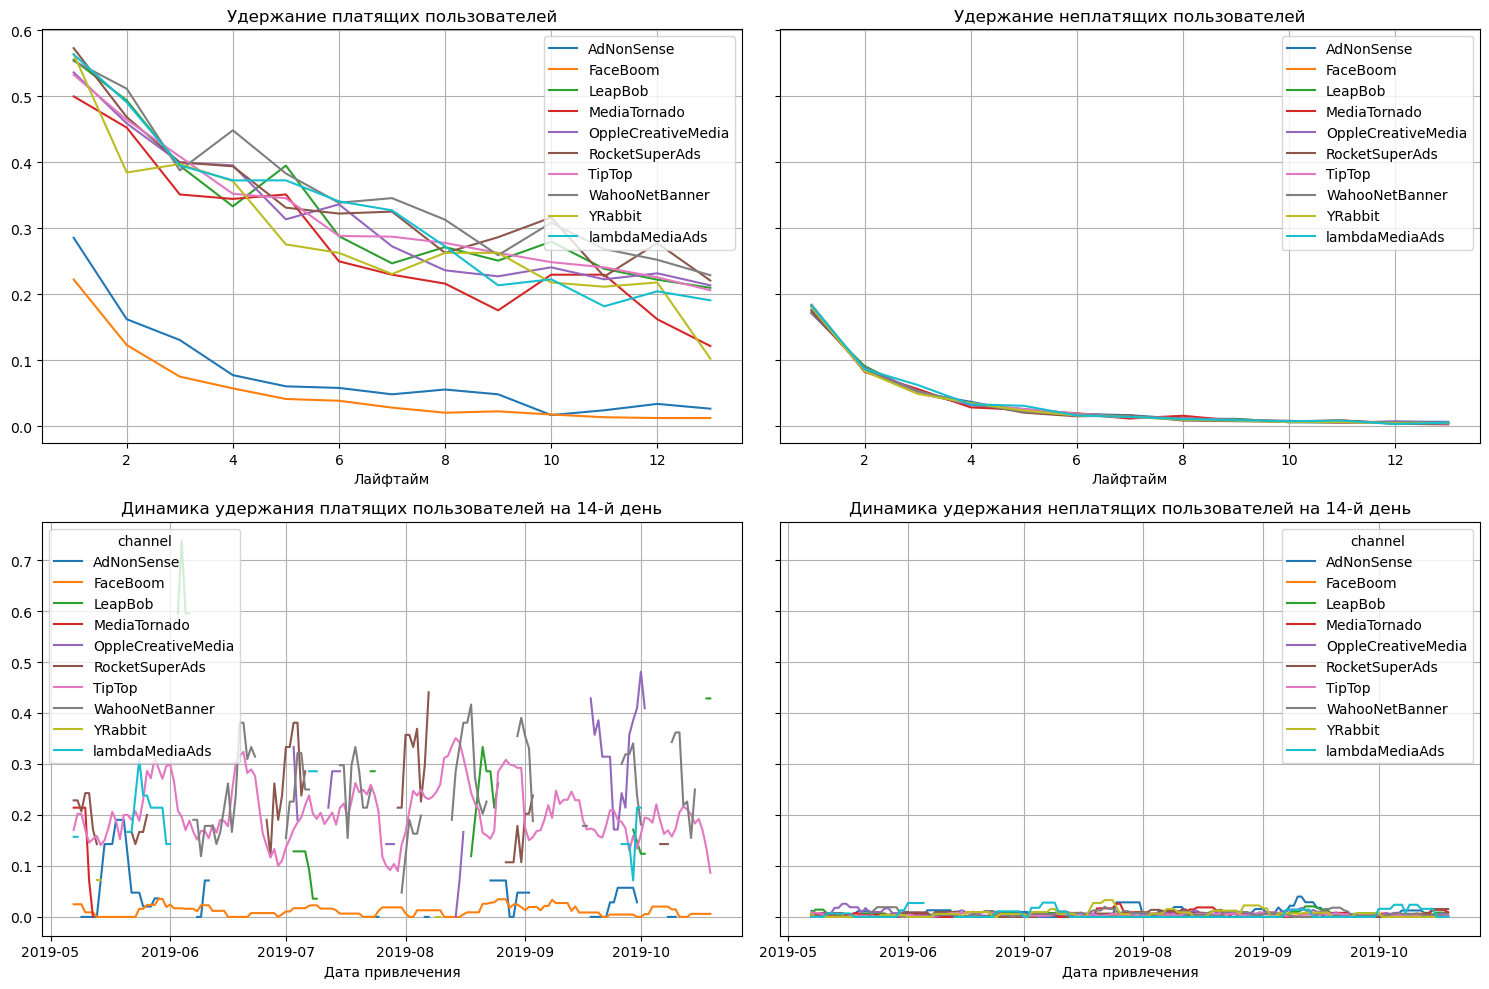

In [60]:
# смотрим удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days) 

На графике хорошо видно, что удержание пользователей на 14-й день, пришедших из FaceBoom и AdNonSense - самые низкие. Несмотря на то, что реклама в TipTop обходится дороже всего, динамика удержания является достаточно высокой. 

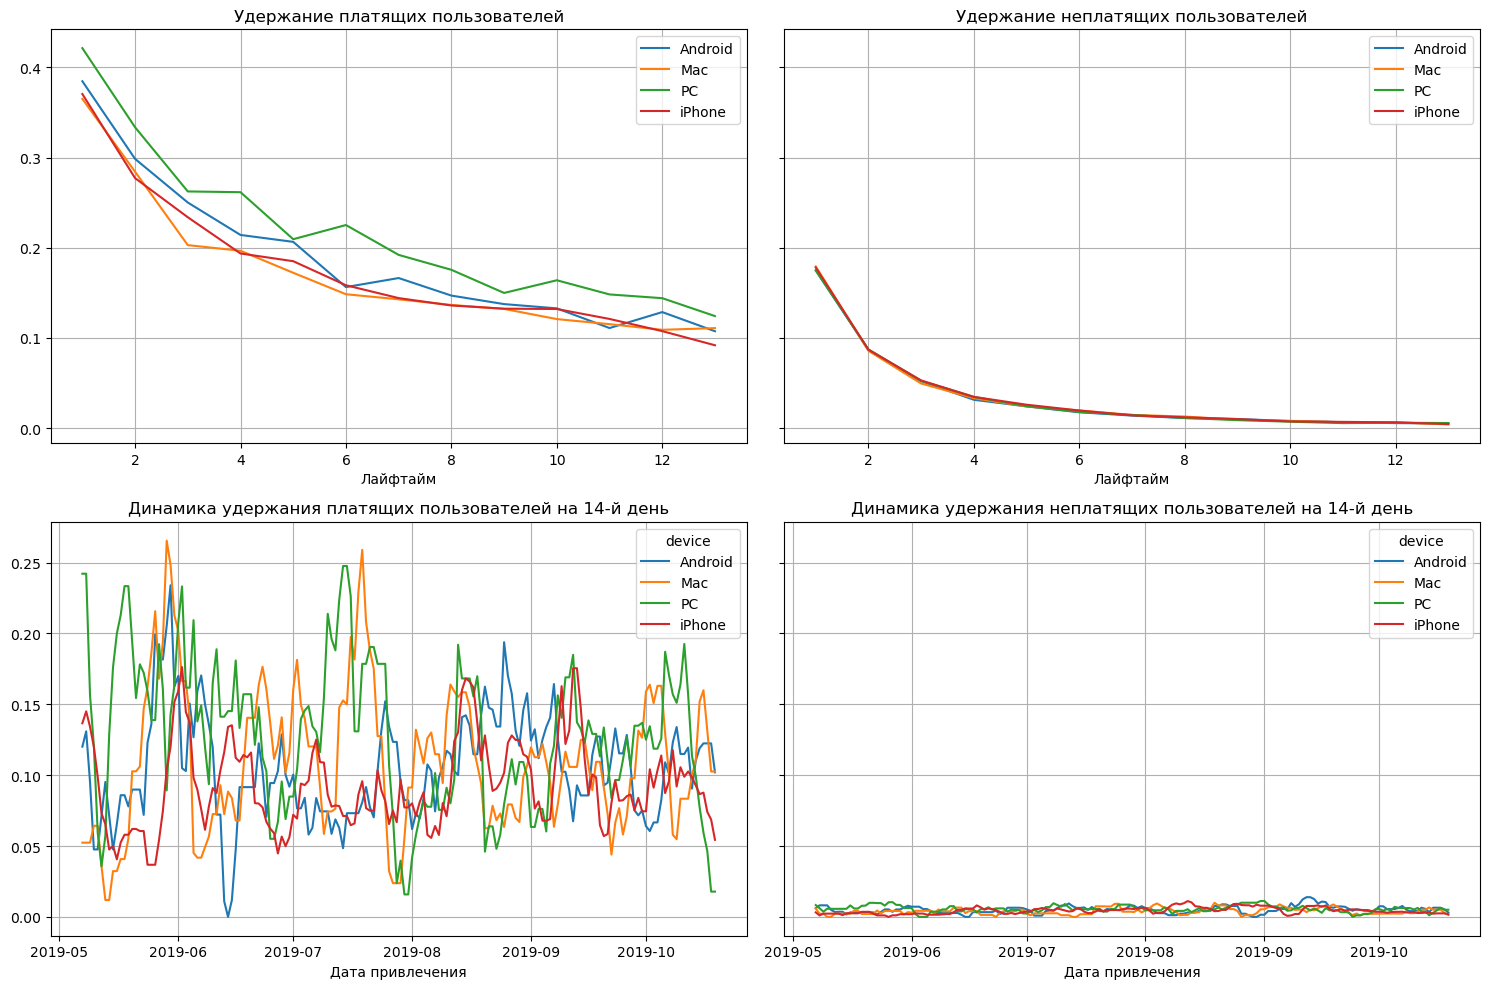

In [61]:
# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=['device'])

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по устройствам стабильно. Значит, дело все-таки в стране и в неправильных приоритетах по рекламным каналам.

### Выводы

Рассмотрев различные маркетинговые показатели, можно сделать вывод, что рекламные компании не окупаются (ROI - 80%). 
Рассматрев окупаемость по сегментам:
- по устройствам - не окупаются все, кроме PC,
- по каналам привлечения - не окупаются TipTop, FaceBoom и AdNonSense,
- по странам - не окупаются пользователи из США.
Стоимость привлечения клиентов из США растет с каждым месяцем, конверсия в США самая большая, но удержание пользователей самое низкое.  
Также растет стоимость привлечения по каналу TipTop. Однако, конверсия и удержание поьзователей на 14 дней не выделяется от основной массы каналов привлечения.  Самое низкое удержание пользователей оказалось у FaceBoom и AdNonSense.

## Общие выводы

В проекте были изучены данные о пользователях приложения Procrastinate Pro+, которые содержат информацию об идентификаторах пользователей, из какой они страны, с какого устройства заходят в приложение, с какого канала привлечения пришли, о дате и сумме покупки приложения, а также проведенных рекламных кампаниях;
На этапе предобработки данных переименованы столбцы, изменены типы данных, произвелся поиск дубликатов, аномалий.  
Были составлены профили пользователей, и в таблицу были включены данные за период 01.05.2019-27.10.2019.  

На рекламные компании потрачено 10547.3 у.е., из которых 83% бюджета потрачено на рекламу в сетях TipTop и FaceBoom. Самое дорогое привлечение одного клиента обходится в 2.8 у.е., и это клиент пришедший из TipTop. Хоть и дорого обходятся эти пользователи, но конверсия и удержание у них высокие и высокая доля платящих пользователей (9,3%), но зато самая низкая окупаемость. Возможно, потому что реклама на этой площадке стоит очень дорого и не соизмерима с прибылью, которую она приносит.

Второй дорогой канал - FaceBoom, обходится в 1.1 у.е. на одного пользователя, при этом, хоть и доля платящих пользователей велика - почти 12%, у него самая низкая удержание платящих пользователей. Возможно, потому что этим пользователя приложение не интересно.

Было выяснено, что у пользоваетелей США самая высокая конверсия и наибольшая доля платящих пользователей, однако, самое низкое удержание и рекламные проекты в этой стране совсем не окупаются.  

В рекламном канале AdNonSense низкое удержание платящих клиентов, а также низкая окупаемость. Возможно, пользователи этого канала не являются целевой аудиторией нашего приложения и стоит отказаться от вложений в эту сеть. 

Убытки компании связаны с неправильным распределением бюджета в рекламные проекты. Отделу маркетинга стоит перераспределить бюджет. Уменьшить долю рекламных кампаний в TipTop и FaceBoom, т.к. при высокой стоимости привлечения, у них низкая окупаемость. А низкое удержание в FaceBoom говорит о том, что , возможно, пользователи этого ресурса не заинтересованы в этом приложении. Перенаправить средства на рекламу в европейских странах (Германию, Великобританию и Францию). Стоит увеличить вложения в менее дорогие каналы привлечения: например, lambdaMediaAds или RocketSuperAds: у них высокая окупаемость, коверсия и доля платящих пользователей.